In [1]:
#Analise de dados
#As criptomoeda foram realizadas download no site investing.com. 
#Foram adquirido dados das váriações das criptomoedas por dia desde que cada criptomoeda começou a ser cotada no site investing.
#Para o Ethereum o inicio foi em 10/03/2016 e para o o BTC foi em 18/07/2010
#Foram feito download das tabelas no formato .csv as quais a tabela Bitcoin Dados Históricos são para bitcoin e 
# Ethereum Dados Histórico são para a criptomoeda Ethereum
#Após o download é possível carregas os dataframe para o estudo, onde df_btc são os dados do bitcoin e df_eth para ethereum

from datetime import datetime, timedelta
import pandas as pd
from pandas.core.indexes.datetimes import date_range
from sklearn import preprocessing

#Ler csv bitcoin
df_btc = pd.read_csv(r'Bitcoin Dados Historicos.csv')
print(df_btc)

#Ler csv Ethereum
df_eth = pd.read_csv(r'Ethereum Dados Historicos.csv')
print(df_eth)


            Data    Último  Abertura    Máxima    Mínima    Vol.    Var%
0     18.07.2010       0,1       0,0       0,1       0,1   0,08K   0,00%
1     19.07.2010       0,1       0,1       0,1       0,1   0,57K   0,00%
2     20.07.2010       0,1       0,1       0,1       0,1   0,26K   0,00%
3     21.07.2010       0,1       0,1       0,1       0,1   0,58K   0,00%
4     22.07.2010       0,1       0,1       0,1       0,1   2,16K   0,00%
...          ...       ...       ...       ...       ...     ...     ...
4190  06.01.2022  43.097,5  43.431,6  43.772,3  42.481,1  63,08K  -0,76%
4191  07.01.2022  41.546,7  43.097,9  43.127,7  40.810,0  88,36K  -3,60%
4192  08.01.2022  41.672,0  41.551,3  42.304,4  40.574,3  52,54K   0,30%
4193  09.01.2022  41.848,3  41.681,2  42.764,4  41.260,9  37,51K   0,42%
4194  10.01.2022  41.832,2  41.848,9  42.243,8  39.697,0  85,50K  -0,04%

[4195 rows x 7 columns]
            Data    Último  Abertura    Máxima    Mínima     Vol.     Var%
0     10.01.2022  3.085,

In [2]:
#No primeiro momento são verificados os tipos dos dados
df_btc.info()
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      4195 non-null   object
 1   Último    4195 non-null   object
 2   Abertura  4195 non-null   object
 3   Máxima    4195 non-null   object
 4   Mínima    4195 non-null   object
 5   Vol.      4195 non-null   object
 6   Var%      4195 non-null   object
dtypes: object(7)
memory usage: 229.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      2133 non-null   object
 1   Último    2133 non-null   object
 2   Abertura  2133 non-null   object
 3   Máxima    2133 non-null   object
 4   Mínima    2133 non-null   object
 5   Vol.      2133 non-null   object
 6   Var%      2133 non-null   object
dtypes: object(7)
memory usage: 116.8+ KB


In [3]:
#Transformar a coluna Data para o tipo Date no formato 'YY-mm-dd'
df_btc['Data'] = pd.to_datetime(df_btc['Data'], format='%d.%m.%Y')
df_eth['Data'] = pd.to_datetime(df_eth['Data'], format='%d.%m.%Y')
df_btc.head(20)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2010-07-18,"0,1","0,0","0,1","0,1","0,08K","0,00%"
1,2010-07-19,"0,1","0,1","0,1","0,1","0,57K","0,00%"
2,2010-07-20,"0,1","0,1","0,1","0,1","0,26K","0,00%"
3,2010-07-21,"0,1","0,1","0,1","0,1","0,58K","0,00%"
4,2010-07-22,"0,1","0,1","0,1","0,1","2,16K","0,00%"
5,2010-07-23,"0,1","0,1","0,1","0,1","2,40K","0,00%"
6,2010-07-24,"0,1","0,1","0,1","0,1","0,50K","0,00%"
7,2010-07-25,"0,1","0,1","0,1","0,1","1,55K","0,00%"
8,2010-07-26,"0,1","0,1","0,1","0,1","0,88K","0,00%"
9,2010-07-27,"0,1","0,1","0,1","0,1","3,37K","0,00%"


In [4]:
#Como a df_eth está decrescente e df_btc está crescente irei padronizar tornando a df_eth crescente
df_eth = df_eth.sort_values(by=['Data'], ascending=True)
df_eth.head(5)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2132,2016-03-10,"11,75","11,20","11,85","11,07","0,00K","4,91%"
2131,2016-03-11,"11,95","11,75","11,95","11,75","0,18K","1,70%"
2130,2016-03-12,"12,92","11,95","13,45","11,95","0,83K","8,12%"
2129,2016-03-13,"15,07","12,92","15,07","12,92","1,30K","16,64%"
2128,2016-03-14,"12,50","15,07","15,07","11,40","92,18K","-17,05%"


In [5]:
#Neste passo será realizado o cast de string para float dos dados. 
#É possível observar, a existencia valores grandes, como por exemplo 41.832,2. 
#Então fazer os seguintes passos: 
#         Retirar '.'
#         Trocar ',' por '.'
df_btc['Último'] = df_btc['Último'].apply(lambda x : x.replace('.',''))
df_btc['Último'] = df_btc['Último'].apply(lambda x : x.replace(',','.')).astype(float)

df_btc['Abertura'] = df_btc['Abertura'].apply(lambda x : x.replace('.',''))
df_btc['Abertura'] = df_btc['Abertura'].apply(lambda x : x.replace(',','.')).astype(float)

df_btc['Máxima'] = df_btc['Máxima'].apply(lambda x : x.replace('.',''))
df_btc['Máxima'] = df_btc['Máxima'].apply(lambda x : x.replace(',','.')).astype(float)

df_btc['Mínima'] = df_btc['Mínima'].apply(lambda x : x.replace('.',''))
df_btc['Mínima'] = df_btc['Mínima'].apply(lambda x : x.replace(',','.')).astype(float)

df_eth['Último'] = df_eth['Último'].apply(lambda x : x.replace('.',''))
df_eth['Último'] = df_eth['Último'].apply(lambda x : x.replace(',','.')).astype(float)

df_eth['Abertura'] = df_eth['Abertura'].apply(lambda x : x.replace('.',''))
df_eth['Abertura'] = df_eth['Abertura'].apply(lambda x : x.replace(',','.')).astype(float)

df_eth['Máxima'] = df_eth['Máxima'].apply(lambda x : x.replace('.',''))
df_eth['Máxima'] = df_eth['Máxima'].apply(lambda x : x.replace(',','.')).astype(float)

df_eth['Mínima'] = df_eth['Mínima'].apply(lambda x : x.replace('.',''))
df_eth['Mínima'] = df_eth['Mínima'].apply(lambda x : x.replace(',','.')).astype(float)
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      4195 non-null   datetime64[ns]
 1   Último    4195 non-null   float64       
 2   Abertura  4195 non-null   float64       
 3   Máxima    4195 non-null   float64       
 4   Mínima    4195 non-null   float64       
 5   Vol.      4195 non-null   object        
 6   Var%      4195 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 229.5+ KB


In [6]:
#Para transformar a coluna volume (Vol.) é necessário realizar a trocar dos sufixos 'K' e 'M'
#que se encontram na coluna
df_btc['Vol.'] = df_btc['Vol.'].apply(lambda x : x.replace('.',''))
df_btc['Vol.'] = df_btc['Vol.'].apply(lambda x : x.replace(',','.'))
sufixes = {
    'K': 1000,
    'M': 1000000
}


for index in df_btc.index:
    vol_str = df_btc.loc[index, 'Vol.']
    if vol_str[-1] in sufixes:
        number, magnitude = vol_str[:-1], vol_str[-1]
        result = float(number) * sufixes[magnitude]
    else:
        result = float(number)
    df_btc.loc[index, 'Vol.'] = result
df_btc['Vol.'] = df_btc['Vol.'].astype(float)
df_btc.head(5)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,"0,00%"
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,"0,00%"
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,"0,00%"
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,"0,00%"
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,"0,00%"


In [7]:
#Transformação para o conjunto de dados da ether
df_eth['Vol.'] = df_eth['Vol.'].apply(lambda x : x.replace('.',''))
df_eth['Vol.'] = df_eth['Vol.'].apply(lambda x : x.replace(',','.'))
sufixes = {
    'K': 1000,
    'M': 1000000
}

for index in df_eth.index:
    vol_str = df_eth.loc[index, 'Vol.']
    if vol_str[-1] in sufixes:
        number, magnitude = vol_str[:-1], vol_str[-1]
        result = float(number) * sufixes[magnitude]
    else:
        result = float(number)
    df_eth.loc[index, 'Vol.'] = result
df_eth['Vol.'] = df_eth['Vol.'].astype(float)
df_eth.head(5)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2132,2016-03-10,11.75,11.20,11.85,11.07,0.0,"4,91%"
2131,2016-03-11,11.95,11.75,11.95,11.75,180.0,"1,70%"
2130,2016-03-12,12.92,11.95,13.45,11.95,830.0,"8,12%"
2129,2016-03-13,15.07,12.92,15.07,12.92,1300.0,"16,64%"
2128,2016-03-14,12.50,15.07,15.07,11.40,92180.0,"-17,05%"


In [8]:
#Remoção do sufixos de '%' da coluna Var%
df_btc['Var%'] = df_btc['Var%'].apply(lambda x : x.replace('.',''))
df_btc['Var%'] = df_btc['Var%'].apply(lambda x : x.replace(',','.'))
df_btc['Var%'] = df_btc['Var%'].apply(lambda x : x.replace('%','')).astype(float)

df_eth['Var%'] = df_eth['Var%'].apply(lambda x : x.replace('.',''))
df_eth['Var%'] = df_eth['Var%'].apply(lambda x : x.replace(',','.'))
df_eth['Var%'] = df_eth['Var%'].apply(lambda x : x.replace('%','')).astype(float)

df_eth.head(5)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2132,2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91
2131,2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70
2130,2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12
2129,2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64
2128,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05


In [9]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      4195 non-null   datetime64[ns]
 1   Último    4195 non-null   float64       
 2   Abertura  4195 non-null   float64       
 3   Máxima    4195 non-null   float64       
 4   Mínima    4195 non-null   float64       
 5   Vol.      4195 non-null   float64       
 6   Var%      4195 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 229.5 KB


In [10]:
#Verificação se existem campos Nulo nos dataframes
result = []
result.append(df_btc['Data'].isnull().values.any())
result.append(df_eth['Data'].isnull().values.any())

result.append(df_btc['Último'].isnull().values.any())
result.append(df_eth['Último'].isnull().values.any())

result.append(df_btc['Abertura'].isnull().values.any())
result.append(df_eth['Abertura'].isnull().values.any())

result.append(df_btc['Máxima'].isnull().values.any())
result.append(df_eth['Máxima'].isnull().values.any())

result.append(df_btc['Mínima'].isnull().values.any())
result.append(df_eth['Mínima'].isnull().values.any())

result.append(df_btc['Vol.'].isnull().values.any())
result.append(df_eth['Vol.'].isnull().values.any())

result.append(df_btc['Var%'].isnull().values.any())
result.append(df_eth['Var%'].isnull().values.any())

print(result)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [11]:
#Verificar se há dados iguais a zero
(df_btc==0).astype(int).sum()

Data          0
Último        0
Abertura      1
Máxima        0
Mínima        2
Vol.          0
Var%        427
dtype: int64

In [12]:
#Verificar se há dados iguais a zero
(df_eth==0).astype(int).sum()

Data         0
Último       0
Abertura     0
Máxima       0
Mínima       0
Vol.         1
Var%        14
dtype: int64

In [13]:
#Como as criptomoedas estão cotadas em dólar, faz-se necessário fazer o download da cotação do dólar
#neste mesmo período da pesquisa das criptomoedas - API do Banco Central do Brasil. 
# ---------------> Baixar pela API <---------------------
# try:
api_bcb = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.10813/dados?formato=csv&dataInicial=18/07/2010&dataFinal=10/01/2022"
df_us_to_brl = pd.read_csv(api_bcb, sep=';')
# catch:
    # df_us_to_brl = pd.read_csv('D:\PosGraduacao\Aulas\Modulo 13 - TCC\BTC_ETH_US\Cotacao_dolar_bcb.csv')
#df_us_to_brl.to_csv("D:\PosGraduacao\Aulas\Modulo 13 - TCC\BTC_ETH_US\Cotacao_dolar_bcb.csv")
df_us_to_brl.head(5)

,data,valor
0,16/07/2010,"1,7784"
1,19/07/2010,"1,7846"
2,20/07/2010,"1,7792"
3,21/07/2010,"1,7758"
4,22/07/2010,"1,7621"


In [14]:
#No primeiro momento é verificado os tipos dos dados
df_us_to_brl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2886 non-null   object
 1   valor   2886 non-null   object
dtypes: object(2)
memory usage: 45.2+ KB


In [15]:
#Transformar a coluna Data para o tipo Date no formato 'YY-mm-dd'
df_us_to_brl['data'] = pd.to_datetime(df_us_to_brl['data'], format='%d/%m/%Y')
df_us_to_brl.head(5)

,data,valor
0,2010-07-16,"1,7784"
1,2010-07-19,"1,7846"
2,2010-07-20,"1,7792"
3,2010-07-21,"1,7758"
4,2010-07-22,"1,7621"


In [16]:
#Criar a faixa de dias subsequentes com menor data e maior data da cotação
dateRange = pd.date_range(start=df_us_to_brl['data'].min(), end=df_us_to_brl['data'].max())
dateRange

DatetimeIndex(['2010-07-16', '2010-07-17', '2010-07-18', '2010-07-19',
               '2010-07-20', '2010-07-21', '2010-07-22', '2010-07-23',
               '2010-07-24', '2010-07-25',
               ...
               '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', length=4197, freq='D')

In [17]:
#Preenchendo os finais de semana e de feriado com o valor da cotação do ultimo dia util
for data in dateRange:    
    if data not in df_us_to_brl.values:
        validDate = False
        beforeDate = data
        while(validDate == False):
            beforeDate = beforeDate - timedelta(days=1)
            validDate = beforeDate in df_us_to_brl.values or beforeDate == df_us_to_brl['data'].min()
        row = df_us_to_brl[df_us_to_brl['data'] == beforeDate].copy()
        row['data'] = data
        df_us_to_brl = df_us_to_brl.append(row,ignore_index=True)
df_us_to_brl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4197 entries, 0 to 4196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    4197 non-null   datetime64[ns]
 1   valor   4197 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 65.7+ KB


In [18]:
#Transformação do tipo object para float 
df_us_to_brl['valor'] = df_us_to_brl['valor'].apply(lambda x : x.replace('.',''))
df_us_to_brl['valor'] = df_us_to_brl['valor'].apply(lambda x : x.replace(',','.')).astype(float)

#Retirada dos dados que não são necessários
firstIndex = df_us_to_brl.index[df_us_to_brl['data'] == "2010-07-16"]
secondIndex = df_us_to_brl.index[df_us_to_brl['data'] == "2010-07-17"]
df_us_to_brl = df_us_to_brl.drop([firstIndex[0], secondIndex[0]])

df_us_to_brl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4195 entries, 1 to 4196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    4195 non-null   datetime64[ns]
 1   valor   4195 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 98.3 KB


In [19]:
print(df_us_to_brl[df_us_to_brl.duplicated()])

Empty DataFrame
Columns: [data, valor]
Index: []


In [20]:
(df_us_to_brl==0).astype(int).sum()

data     0
valor    0
dtype: int64

In [21]:
#Verificação de dados nulos
result = []
result.append(df_us_to_brl['data'].isnull().values.any())
result.append(df_us_to_brl['valor'].isnull().values.any())
print(result)

[False, False]


In [22]:
#Verificação do estado do dataset
df_us_to_brl.head(5)

,data,valor
1,2010-07-19,1.7846
2,2010-07-20,1.7792
3,2010-07-21,1.7758
4,2010-07-22,1.7621
5,2010-07-23,1.7609


In [23]:
#Ordenação dos dados após o preenchimento de datas faltantes
df_us_to_brl = df_us_to_brl.sort_values(by=['data'], ascending=True)
df_us_to_brl.head(5)

,data,valor
2887,2010-07-18,1.7784
1,2010-07-19,1.7846
2,2010-07-20,1.7792
3,2010-07-21,1.7758
4,2010-07-22,1.7621


In [24]:
#Tres datasets para a análise
df_btc.info()
df_eth.info()
df_us_to_brl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      4195 non-null   datetime64[ns]
 1   Último    4195 non-null   float64       
 2   Abertura  4195 non-null   float64       
 3   Máxima    4195 non-null   float64       
 4   Mínima    4195 non-null   float64       
 5   Vol.      4195 non-null   float64       
 6   Var%      4195 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 229.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 2132 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      2133 non-null   datetime64[ns]
 1   Último    2133 non-null   float64       
 2   Abertura  2133 non-null   float64       
 3   Máxima    2133 non-null   float64       
 4   Mínima    2133 non-null   float6

In [25]:
#Retirada de acentos e parametrização de nomes das colunas
# Depois, para facilitar a identificação da coluna de valores, será feita a trocar de valor para Valor_Dolar
df_us_to_brl.rename(columns={'data': 'Data', 'valor' : 'Valor_Dolar'}, inplace=True)

df_btc.rename(columns={'Último': 'Ultimo', 'Máxima' : 'Maxima', 'Mínima' : 'Minima'}, inplace=True)
df_eth.rename(columns={'Último': 'Ultimo', 'Máxima' : 'Maxima', 'Mínima' : 'Minima'}, inplace=True)
df_us_to_brl

,Data,Valor_Dolar
2887,2010-07-18,1.7784
1,2010-07-19,1.7846
2,2010-07-20,1.7792
3,2010-07-21,1.7758
4,2010-07-22,1.7621
...,...,...
2883,2022-01-06,5.7036
2884,2022-01-07,5.6747
4195,2022-01-08,5.6747
4196,2022-01-09,5.6747


In [26]:
#Definir 'Data' como index
df_btc = df_btc.set_index('Data')
df_eth = df_eth.set_index('Data')

df_us_to_brl = df_us_to_brl.set_index('Data')

df_btc.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4195 entries, 2010-07-18 to 2022-01-10
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    4195 non-null   float64
 1   Abertura  4195 non-null   float64
 2   Maxima    4195 non-null   float64
 3   Minima    4195 non-null   float64
 4   Vol.      4195 non-null   float64
 5   Var%      4195 non-null   float64
dtypes: float64(6)
memory usage: 229.4 KB


In [27]:
df_us_to_brl

,Valor_Dolar
Data,
2010-07-18,1.7784
2010-07-19,1.7846
2010-07-20,1.7792
2010-07-21,1.7758
2010-07-22,1.7621
...,...
2022-01-06,5.7036
2022-01-07,5.6747
2022-01-08,5.6747


In [28]:
#Merge_BTC_COTACAO gerando novo dataFrame: df_btc_cotacao
df_btc_cotacao = pd.merge(df_btc, df_us_to_brl, left_index=True, right_index=True)
df_btc_cotacao


,Ultimo,Abertura,Maxima,Minima,Vol.,Var%,Valor_Dolar
Data,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00,1.7784
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00,1.7846
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00,1.7792
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00,1.7758
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00,1.7621
...,...,...,...,...,...,...,...
2022-01-06,43097.5,43431.6,43772.3,42481.1,63080.0,-0.76,5.7036
2022-01-07,41546.7,43097.9,43127.7,40810.0,88360.0,-3.60,5.6747
2022-01-08,41672.0,41551.3,42304.4,40574.3,52540.0,0.30,5.6747


In [29]:
#Merge_ETH_COTACAO gerando novo dataFrame: df_eth_cotacao
df_eth_cotacao = pd.merge(df_eth, df_us_to_brl, left_index=True, right_index=True)
df_eth_cotacao

,Ultimo,Abertura,Maxima,Minima,Vol.,Var%,Valor_Dolar
Data,,,,,,,
2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91,3.6694
2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70,3.6265
2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12,3.6265
2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64,3.6265
2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05,3.6232
...,...,...,...,...,...,...,...
2022-01-06,3407.77,3536.15,3550.19,3306.14,701890.0,-3.62,5.7036
2022-01-07,3195.31,3407.22,3413.26,3077.30,979250.0,-6.23,5.6747
2022-01-08,3080.02,3198.14,3244.46,3001.76,566060.0,-3.61,5.6747


In [30]:
#Verificar a junção dos dados
df_btc_cotacao

,Ultimo,Abertura,Maxima,Minima,Vol.,Var%,Valor_Dolar
Data,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00,1.7784
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00,1.7846
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00,1.7792
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00,1.7758
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00,1.7621
...,...,...,...,...,...,...,...
2022-01-06,43097.5,43431.6,43772.3,42481.1,63080.0,-0.76,5.7036
2022-01-07,41546.7,43097.9,43127.7,40810.0,88360.0,-3.60,5.6747
2022-01-08,41672.0,41551.3,42304.4,40574.3,52540.0,0.30,5.6747


In [31]:
##----------------Analise e exploração dos dados-----------------------##
# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


In [32]:
#Gerar csvs novos para BTC e ETH
df_btc_cotacao.to_csv(r"Bitcoin_Cotacao.csv")
df_eth_cotacao.to_csv(r"Ether_Cotacao.csv")

<AxesSubplot:title={'center':'Valor BTC por Tempo'}, xlabel='Data'>

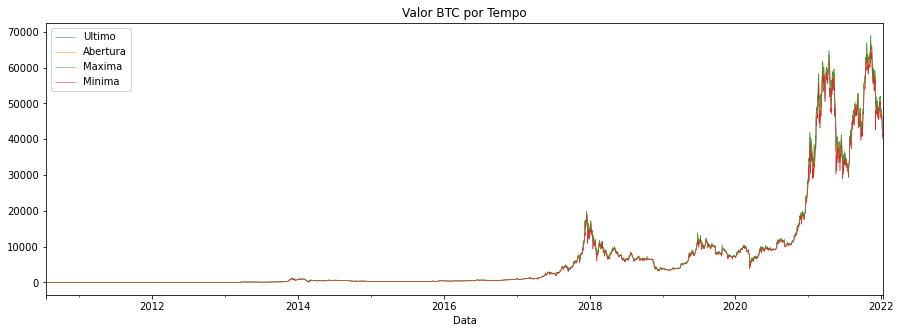

In [33]:
#Grafico de linha - Bitcoin
df_btc_cotacao[['Ultimo', 'Abertura', 'Maxima', 'Minima']].plot(title='Valor BTC por Tempo',
                                                                kind='line', figsize=(15,5), linewidth=0.5 )

<AxesSubplot:title={'center':'Valor BTC até 2016'}, xlabel='Data'>

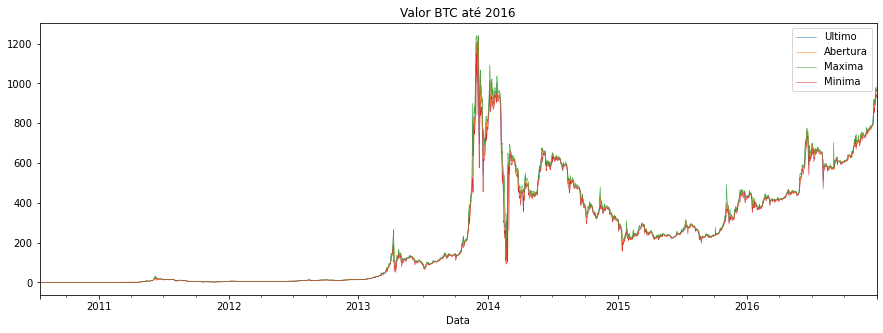

In [34]:
#Divindo os gráfico em duas partes: 1ª parte (2010-2016)
btc_2010_2016 = df_btc_cotacao.loc['2010-01-01':'2016-12-31']
btc_2010_2016[['Ultimo', 'Abertura', 'Maxima', 'Minima']].plot(title='Valor BTC até 2016', kind='line', 
                                                                figsize=(15,5), linewidth=0.5,)

<AxesSubplot:title={'center':'Valor BTC de 2017 até 2022'}, xlabel='Data'>

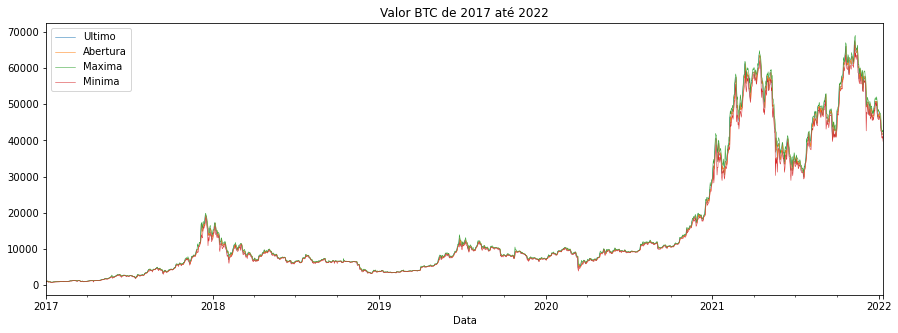

In [35]:
#Divindo os gráfico em duas partes: 2ª parte (2017-2022)
btc_2017_2022 = df_btc_cotacao.loc['2017-01-01':'2022-03-31']
btc_2017_2022[['Ultimo', 'Abertura', 'Maxima', 'Minima']].plot(title='Valor BTC de 2017 até 2022', kind='line', 
                                                                figsize=(15,5), linewidth=0.5)

<AxesSubplot:title={'center':'Cotacao dolar 2016-2022'}, xlabel='Data'>

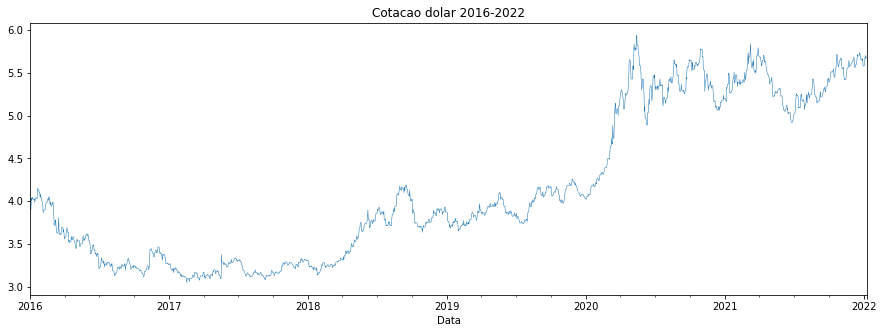

In [36]:
#Analise do dólar 2016-2022
cotacao_2017 = df_btc_cotacao.loc['2016-01-01':'2022-03-31']
cotacao_2017['Valor_Dolar'].plot(title='Cotacao dolar 2016-2022', kind='line', figsize=(15,5), linewidth=0.5)

<AxesSubplot:title={'center':'Ether em US$ de 2016 a 2022'}, xlabel='Data'>

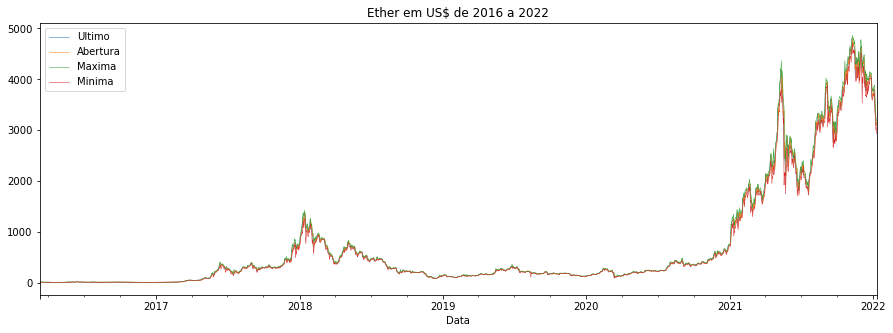

In [37]:
#Crescimento do ether 2016 até 2022
df_eth_cotacao[['Ultimo', 'Abertura', 'Maxima', 'Minima']].plot(title='Ether em US$ de 2016 a 2022', 
                                                            kind='line', figsize=(15,5), linewidth=0.5)

In [38]:
#Valores em 2020
btc_2017_2022.loc['2020-01-01':'2020-12-31']

,Ultimo,Abertura,Maxima,Minima,Vol.,Var%,Valor_Dolar
Data,,,,,,,
2020-01-01,7199.8,7196.4,7259.4,7180.0,420280.0,0.05,4.0301
2020-01-02,6967.0,7199.7,7209.6,6901.4,632780.0,-3.23,4.0207
2020-01-03,7343.1,6967.1,7402.9,6884.1,936290.0,5.40,4.0516
2020-01-04,7376.8,7345.1,7433.1,7291.4,523910.0,0.46,4.0516
2020-01-05,7372.5,7376.8,7501.0,7345.6,628140.0,-0.06,4.0516
...,...,...,...,...,...,...,...
2020-12-27,26261.3,26460.3,28360.3,25858.2,231230.0,-0.73,5.1785
2020-12-28,27057.8,26259.2,27444.9,26144.3,126980.0,3.03,5.2384
2020-12-29,27376.0,27065.3,27390.7,25902.8,119570.0,1.18,5.1936


<AxesSubplot:xlabel='Data'>

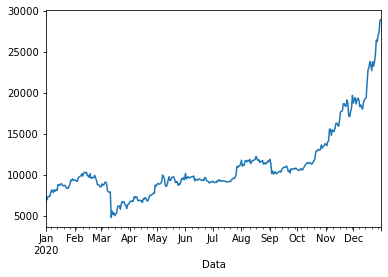

In [39]:
#Grafico de aumento da bitcoin em 2020
btc_2017_2022.loc['2020-01-01':'2020-12-31']['Ultimo'].plot(kind='line')

<AxesSubplot:xlabel='Data'>

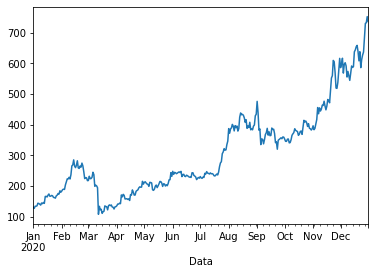

In [40]:
#Grafico do ether em 2020
df_eth_cotacao.loc['2020-01-01':'2020-12-31']['Ultimo'].plot(kind='line')

In [41]:
df_btc_cotacao.describe()

,Ultimo,Abertura,Maxima,Minima,Vol.,Var%,Valor_Dolar
count,4195.000000,4195.000000,4195.000000,4195.000000,4.195000e+03,4195.000000,4195.000000
mean,6981.820977,6971.904219,7172.643862,6747.237807,2.852508e+05,0.475874,3.242251
std,13632.320056,13622.223933,14006.264763,13181.896902,9.678105e+05,7.636636,1.217764
min,0.100000,0.000000,0.100000,0.000000,3.018000e+01,-57.210000,1.533700
25%,106.450000,106.300000,109.800000,101.500000,2.810000e+04,-1.190000,2.123650
50%,616.700000,616.000000,627.900000,605.900000,6.476000e+04,0.000000,3.209100
75%,7772.550000,7762.550000,8010.000000,7520.100000,1.628000e+05,1.920000,3.936400
max,67527.900000,67528.700000,68990.600000,66334.900000,2.026000e+07,336.840000,5.936600


<AxesSubplot:>

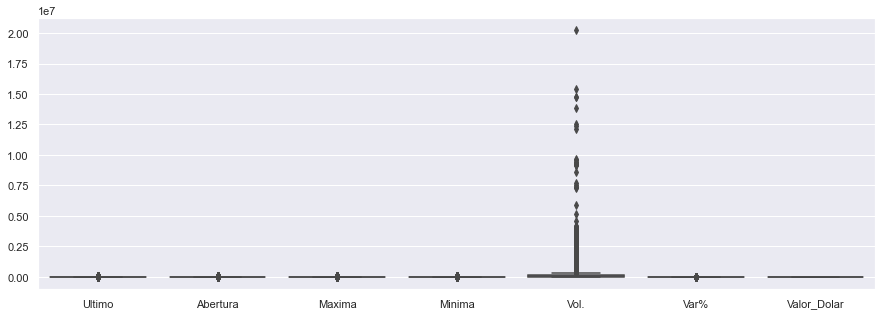

In [42]:
#Boxplot da Bitcoin_Cotacao
sns.set(rc={"figure.figsize":(15, 5)})
sns.boxplot(data=df_btc_cotacao)

<AxesSubplot:>

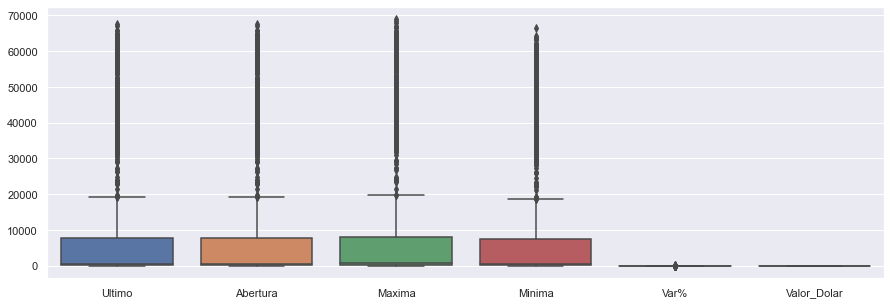

In [43]:
#Boxplot da Bitcoin_Cotacao
sns.set(rc={"figure.figsize":(15, 5)})
sns.boxplot(data=df_btc_cotacao.drop('Vol.', axis=1))

<AxesSubplot:>

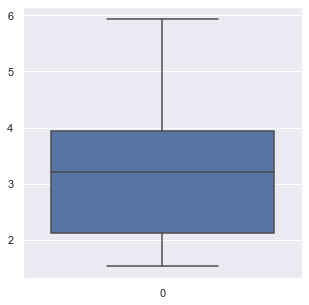

In [44]:
#Boxplot da Bitcoin_Cotacao
sns.set(rc={"figure.figsize":(5, 5)})
sns.boxplot(data=df_btc_cotacao['Valor_Dolar'])

<AxesSubplot:>

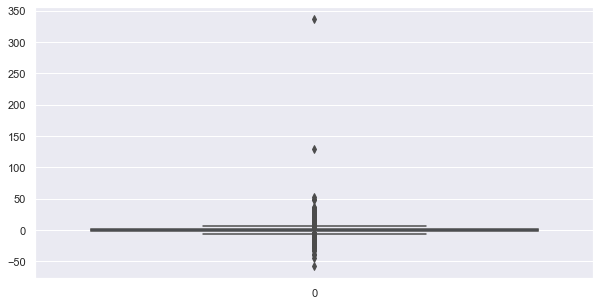

In [45]:
#Boxplot da Variação
sns.set(rc={"figure.figsize":(10, 5)})
sns.boxplot(data=df_btc_cotacao['Var%'])

<AxesSubplot:>

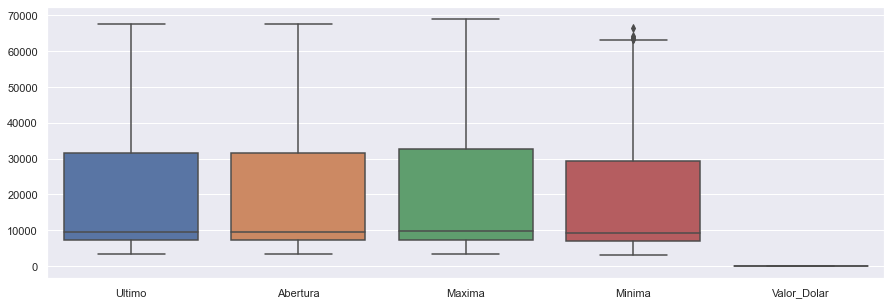

In [46]:
#Boxplot da Bitcoin_Cotacao com corte em 2017
sns.set(rc={"figure.figsize":(15, 5)})
sns.boxplot(data=df_btc_cotacao.drop(['Vol.', 'Var%'], axis=1).loc['2018-01-01':])

In [47]:
df_btc_cotacao.drop(['Vol.', 'Var%'], axis=1).loc['2018-01-01':].describe()

,Ultimo,Abertura,Maxima,Minima,Valor_Dolar
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,18531.479470,18512.617879,19029.065534,17928.695581,4.543970
std,17821.158997,17811.328506,18313.490138,17231.831648,0.811928
min,3228.700000,3228.600000,3282.300000,3177.000000,3.138000
25%,7114.250000,7114.150000,7290.950000,6870.000000,3.844150
50%,9491.000000,9491.100000,9695.600000,9262.700000,4.183100
75%,31556.300000,31451.150000,32565.400000,29414.750000,5.346100
max,67527.900000,67528.700000,68990.600000,66334.900000,5.936600


In [48]:
#Analise da Ether
#Aplicando o método describe na Ether 
df_eth_cotacao.describe()
# vemos uma semelhança entre a bitcoin e ela. Existe também uma volatilidade e os dados iniciais não contrastam 
#com a realidade atual

,Ultimo,Abertura,Maxima,Minima,Vol.,Var%,Valor_Dolar
count,2133.000000,2133.000000,2133.000000,2133.000000,2.133000e+03,2133.000000,2133.000000
mean,696.814121,695.391932,720.979114,665.958729,5.323725e+06,0.426071,4.149663
std,1079.522433,1078.397871,1114.118427,1035.961276,7.781921e+06,5.684946,0.898346
min,6.700000,6.680000,7.320000,5.860000,0.000000e+00,-44.550000,3.050400
25%,131.030000,131.020000,134.930000,125.070000,5.409700e+05,-2.200000,3.291400
50%,238.620000,238.380000,245.610000,228.630000,1.620000e+06,0.110000,3.865200
75%,591.300000,591.030000,609.390000,566.150000,8.200000e+06,3.010000,5.196100
max,4808.380000,4808.340000,4864.060000,4715.430000,7.747000e+07,29.510000,5.936600


<AxesSubplot:>

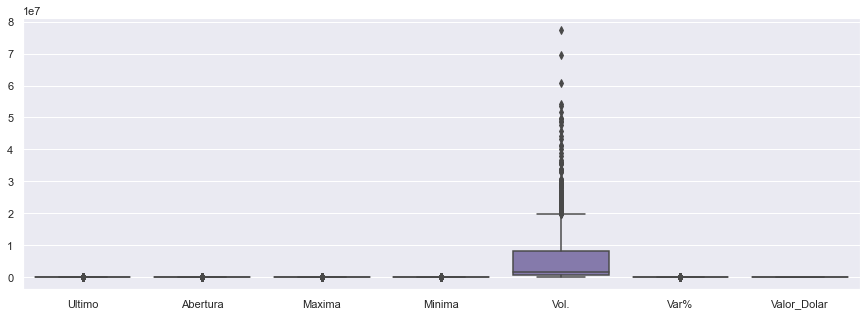

In [49]:
#Boxplot para Ether
sns.set(rc={"figure.figsize":(15, 5)})
sns.boxplot(data=df_eth_cotacao)
#Assim como bitcoin a coluna volume (Vol.) tem valores muito maiores que as outras colunas e a coluna Var% tem valores menores 
#e então serão retiradas do gráfico para possibilitar a visualização dos outros dados.

<AxesSubplot:>

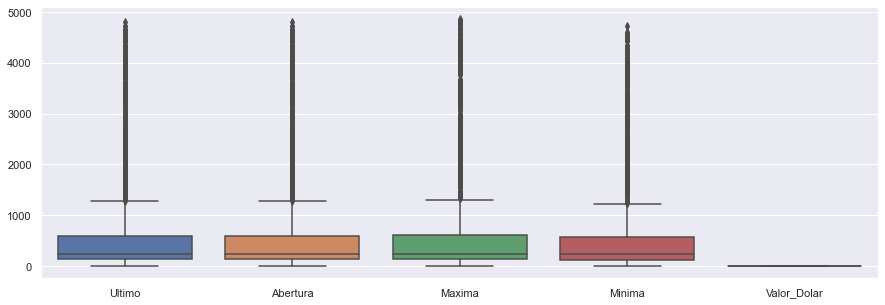

In [50]:
#Retirada das colunas Vol. e Var%
sns.set(rc={"figure.figsize":(15, 5)})
sns.boxplot(data=df_eth_cotacao.drop(['Vol.', 'Var%'], axis=1))

<AxesSubplot:>

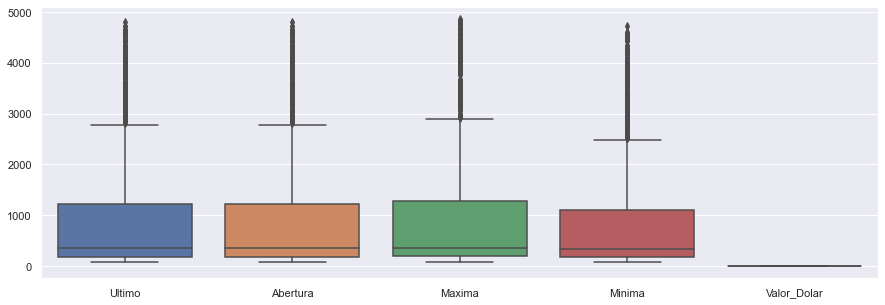

In [51]:
sns.set(rc={"figure.figsize":(15, 5)})
sns.boxplot(data=df_eth_cotacao.drop(['Vol.', 'Var%'], axis=1).loc['2018-01-01':])

In [52]:
df_eth_cotacao.drop(['Vol.', 'Var%'], axis=1).loc['2018-01-01':].describe()

,Ultimo,Abertura,Maxima,Minima,Valor_Dolar
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,953.481992,951.912094,986.021706,912.344847,4.543970
std,1210.258345,1209.005951,1248.785193,1161.676184,0.811928
min,83.810000,83.810000,85.070000,77.650000,3.138000
25%,187.115000,187.135000,191.810000,181.435000,3.844150
50%,352.060000,352.060000,358.330000,337.210000,4.183100
75%,1227.220000,1226.330000,1272.250000,1105.750000,5.346100
max,4808.380000,4808.340000,4864.060000,4715.430000,5.936600


In [53]:
#Criação dos dois novos dataset que serão trabalhados nos próximos tópicos
bitcoin_Dolar_2018_2022 = df_btc_cotacao.loc['2018-01-01':]
bitcoin_Dolar_2018_2022

,Ultimo,Abertura,Maxima,Minima,Vol.,Var%,Valor_Dolar
Data,,,,,,,
2018-01-01,13444.9,13850.5,13921.5,12877.7,78430.0,-2.93,3.3074
2018-01-02,14754.1,13444.9,15306.1,12934.2,137730.0,9.74,3.2691
2018-01-03,15156.6,14754.1,15435.0,14579.7,106540.0,2.73,3.2529
2018-01-04,15180.1,15156.5,15408.7,14244.7,110970.0,0.15,3.2312
2018-01-05,16954.8,15180.1,17126.9,14832.4,141960.0,11.69,3.2403
...,...,...,...,...,...,...,...
2022-01-06,43097.5,43431.6,43772.3,42481.1,63080.0,-0.76,5.7036
2022-01-07,41546.7,43097.9,43127.7,40810.0,88360.0,-3.60,5.6747
2022-01-08,41672.0,41551.3,42304.4,40574.3,52540.0,0.30,5.6747


In [54]:
ether_Dolar_2018_2022 = df_eth_cotacao.loc['2018-01-01':]
ether_Dolar_2018_2022

,Ultimo,Abertura,Maxima,Minima,Vol.,Var%,Valor_Dolar
Data,,,,,,,
2018-01-01,752.46,736.77,762.00,717.94,425460.0,2.13,3.3074
2018-01-02,858.78,752.46,890.00,752.46,1470000.0,14.13,3.2691
2018-01-03,942.01,858.78,954.73,840.00,1090000.0,9.69,3.2529
2018-01-04,940.00,942.01,997.00,893.24,1220000.0,-0.21,3.2312
2018-01-05,962.77,939.30,1023.60,930.00,1040000.0,2.42,3.2403
...,...,...,...,...,...,...,...
2022-01-06,3407.77,3536.15,3550.19,3306.14,701890.0,-3.62,5.7036
2022-01-07,3195.31,3407.22,3413.26,3077.30,979250.0,-6.23,5.6747
2022-01-08,3080.02,3198.14,3244.46,3001.76,566060.0,-3.61,5.6747


In [55]:
##Analise de correlação dos dados
corr = bitcoin_Dolar_2018_2022.corr().abs()
print(corr['Ultimo'].sort_values())

corr = ether_Dolar_2018_2022.corr().abs()
print(corr['Ultimo'].sort_values())

Var%           0.028050
Vol.           0.252246
Valor_Dolar    0.664118
Abertura       0.998382
Minima         0.999145
Maxima         0.999287
Ultimo         1.000000
Name: Ultimo, dtype: float64
Var%           0.032154
Vol.           0.443594
Valor_Dolar    0.535659
Abertura       0.997886
Minima         0.998958
Maxima         0.998978
Ultimo         1.000000
Name: Ultimo, dtype: float64


In [56]:
#Removendo a coluna Var%
bitcoin_Dolar_2018_2022 = bitcoin_Dolar_2018_2022.drop('Var%', axis=1)
ether_Dolar_2018_2022 = ether_Dolar_2018_2022.drop('Var%', axis=1)
bitcoin_Dolar_2018_2022

,Ultimo,Abertura,Maxima,Minima,Vol.,Valor_Dolar
Data,,,,,,
2018-01-01,13444.9,13850.5,13921.5,12877.7,78430.0,3.3074
2018-01-02,14754.1,13444.9,15306.1,12934.2,137730.0,3.2691
2018-01-03,15156.6,14754.1,15435.0,14579.7,106540.0,3.2529
2018-01-04,15180.1,15156.5,15408.7,14244.7,110970.0,3.2312
2018-01-05,16954.8,15180.1,17126.9,14832.4,141960.0,3.2403
...,...,...,...,...,...,...
2022-01-06,43097.5,43431.6,43772.3,42481.1,63080.0,5.7036
2022-01-07,41546.7,43097.9,43127.7,40810.0,88360.0,5.6747
2022-01-08,41672.0,41551.3,42304.4,40574.3,52540.0,5.6747


In [57]:
##-------------------------------------MODELOS ML----------------------------------##
#Vamos normalizar os dados por estarem em dimensões muito diferentes e traze-los para valores em comum
#Será aplicado a tecnica de MinMaxScaler que dimensionará os dados para um intervalo de [0,1]
# scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
# bitcoin_normalized = scaler.fit_transform(bitcoinData)
# bitcoin_normalized

In [58]:
#--------------------------------------Ridge regression---------------------------------------#
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

#copiando o df e criando coluna Target com o dia valor do dia posterior
df_ridget_btc = bitcoin_Dolar_2018_2022.copy()
df_ridget_btc['Target'] = df_ridget_btc['Ultimo'].shift(-1)

df_ridget_eth = ether_Dolar_2018_2022.copy()
df_ridget_eth['Target'] = df_ridget_eth['Ultimo'].shift(-1)

#Excluindo a ultima linha
df_ridget_btc = df_ridget_btc[:-1]
df_ridget_eth = df_ridget_eth[:-1]

df_ridget_btc

,Ultimo,Abertura,Maxima,Minima,Vol.,Valor_Dolar,Target
Data,,,,,,,
2018-01-01,13444.9,13850.5,13921.5,12877.7,78430.0,3.3074,14754.1
2018-01-02,14754.1,13444.9,15306.1,12934.2,137730.0,3.2691,15156.6
2018-01-03,15156.6,14754.1,15435.0,14579.7,106540.0,3.2529,15180.1
2018-01-04,15180.1,15156.5,15408.7,14244.7,110970.0,3.2312,16954.8
2018-01-05,16954.8,15180.1,17126.9,14832.4,141960.0,3.2403,17172.3
...,...,...,...,...,...,...,...
2022-01-05,43425.9,45833.1,47019.4,42535.1,83740.0,5.6622,43097.5
2022-01-06,43097.5,43431.6,43772.3,42481.1,63080.0,5.7036,41546.7
2022-01-07,41546.7,43097.9,43127.7,40810.0,88360.0,5.6747,41672.0


In [59]:
#Normalizar os dados
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_ridget_btc)
scaled_data.shape

(1470, 7)

In [60]:
#Para a x usaremos todos os recursos disponiveis menos a coluna Target
#Target será usada na coluna y
x = scaled_data[:,:6]
y = scaled_data[:,6:]

x.shape,y.shape

((1470, 6), (1470, 1))

In [61]:
#Separando treino de teste 70/30
len_split = int (len(df_ridget_btc)*0.7)

x_train = x[:len_split]
y_train = y[:len_split]

x_test = x[len_split:]
y_test = y[len_split:]

x_train.shape, x_test.shape

((1029, 6), (441, 6))

In [62]:
#Escolhendo o melhor alpha
from sklearn.linear_model import RidgeCV
regr_cv = RidgeCV(alphas=[0.1, 0.5, 1.0, 1.5, 2.0])
bestAlpha = regr_cv.fit(x_train, y_train)
bestAlpha.alpha_

0.1

In [63]:
#Aplicando Ridge regression
model = Ridge(alpha=0.1)
model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [64]:
# Teste de predição
predict_values = model.predict(x_test)

In [65]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : [f'Ridge Regression alpha = {bestAlpha.alpha_}'], 'MSE' : [mse], 'RMSE' : [rmse], 'MAE' : [mae], 'MAPE' : [mape]}
df_score_btc = pd.DataFrame(score_data)
df_score_btc

MSE: 0.001168166814873873
RMSE: 0.03417845541966274
MAE: 0.026641813697438232
MAPE: 0.04340690598011525


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001168,0.034178,0.026642,0.043407


In [66]:
#Cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, x_train, y_train)
score

array([0.94457484, 0.96921208, 0.97961897, 0.91201948, 0.95209541])

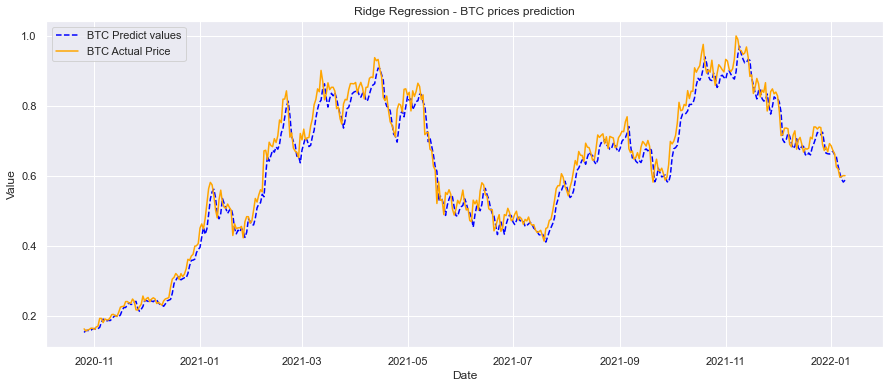

In [67]:
plt.figure(figsize=(15,6))

date_range = df_ridget_btc.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='BTC Predict values')
plt.plot(date_range, y_test, color='orange', label='BTC Actual Price')
plt.title('Ridge Regression - BTC prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [68]:
# #Revert values
# reverse_predict_values = np.append(x_test, predict_values, axis=1)
# reverse_y_test_values = np.append(x_test, y_test, axis=1)
# predict_reverted_values = scaler.inverse_transform(reverse_values)
# actual_reverted_values = scaler.inverse_transform(reverse_y_test_values)
# predict_reverted_values

In [69]:
# #Calculando os erros dos valores reais
# reverted_real_values = actual_reverted_values[:,6]
# reverted_predicted_values = predict_reverted_values[:,6] 
# mse = metrics.mean_squared_error(y_true=reverted_real_values, y_pred=reverted_predicted_values)
# rmse = metrics.mean_squared_error(y_true=reverted_real_values, y_pred= reverted_predicted_values, squared=False)
# mae = metrics.mean_absolute_error(y_true=reverted_real_values, y_pred=reverted_predicted_values)
# mape = metrics.mean_absolute_percentage_error(y_true=reverted_real_values, y_pred=reverted_predicted_values)
# print(f'MSE: {mse}')
# print(f'RMSE: {rmse}')
# print(f'MAE: {mae}')
# print(f'MAPE: {mape}')
# score_data = {'Model' : [f'Ridge Regression alpha = {bestAlpha.alpha_}'], 'MSE' : [mse], 'RMSE' : [rmse], 'MAE' : [mae], 'MAPE' : [mape]}
# df_real_values_score_btc = pd.DataFrame(score_data)
# df_real_values_score_btc
# df_btc_predito = pd.DataFrame({'y_test':reverted_real_values, 'predict_value_Ridge_0.1' : reverted_predicted_values })

In [70]:
# df_ridget_btc_predito

In [71]:
#BTC com alpha= 0.5

#Aplicando Ridge regression
model = Ridge(alpha=0.5)
model.fit(x_train, y_train)

# Teste de predição
predict_values = model.predict(x_test)

In [72]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : 'Ridge Regression alpha = 0.5', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_btc = df_score_btc.append(score_data, ignore_index=True)
df_score_btc

MSE: 0.0037861987790015253
RMSE: 0.06153209551934279
MAE: 0.05228829632991058
MAPE: 0.08221487446727431


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001168,0.034178,0.026642,0.043407
1,Ridge Regression alpha = 0.5,0.003786,0.061532,0.052288,0.082215


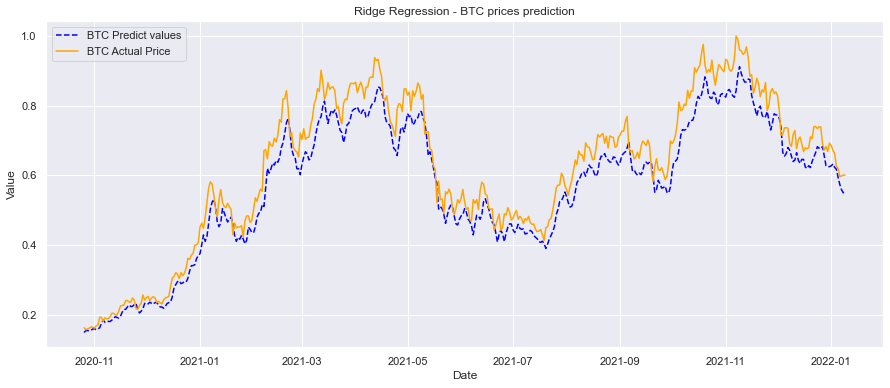

In [73]:
plt.figure(figsize=(15,6))

date_range = df_ridget_btc.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='BTC Predict values')
plt.plot(date_range, y_test, color='orange', label='BTC Actual Price')
plt.title('Ridge Regression - BTC prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [74]:
#BTC com alpha= 1.0

#Aplicando Ridge regression
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

# Teste de predição
predict_values = model.predict(x_test)

#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : 'Ridge Regression alpha = 1.0', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_btc = df_score_btc.append(score_data, ignore_index=True)
df_score_btc

MSE: 0.00957979714020485
RMSE: 0.0978764381258577
MAE: 0.0878133936487352
MAPE: 0.136899860215307


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001168,0.034178,0.026642,0.043407
1,Ridge Regression alpha = 0.5,0.003786,0.061532,0.052288,0.082215
2,Ridge Regression alpha = 1.0,0.009580,0.097876,0.087813,0.136900


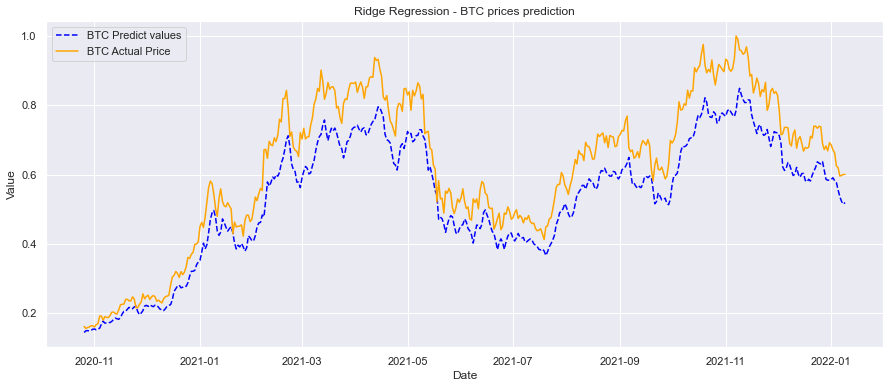

In [75]:
plt.figure(figsize=(15,6))

date_range = df_ridget_btc.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='BTC Predict values')
plt.plot(date_range, y_test, color='orange', label='BTC Actual Price')
plt.title('Ridge Regression - BTC prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [76]:
#BTC com alpha= 2.0

#Aplicando Ridge regression
model = Ridge(alpha=2.0)
model.fit(x_train, y_train)

# Teste de predição
predict_values = model.predict(x_test)

In [77]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : 'Ridge Regression alpha = 2.0', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_btc = df_score_btc.append(score_data, ignore_index=True)
df_score_btc

MSE: 0.025226448839233435
RMSE: 0.15882836282992227
MAE: 0.14596726297557425
MAPE: 0.22704046654088858


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001168,0.034178,0.026642,0.043407
1,Ridge Regression alpha = 0.5,0.003786,0.061532,0.052288,0.082215
2,Ridge Regression alpha = 1.0,0.009580,0.097876,0.087813,0.136900
3,Ridge Regression alpha = 2.0,0.025226,0.158828,0.145967,0.227040


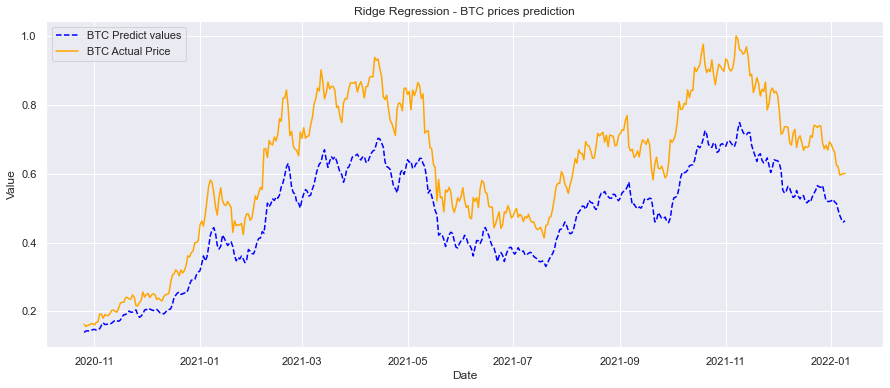

In [78]:
plt.figure(figsize=(15,6))

date_range = df_ridget_btc.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='BTC Predict values')
plt.plot(date_range, y_test, color='orange', label='BTC Actual Price')
plt.title('Ridge Regression - BTC prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [79]:
#-------Ridge regression para Ether--------#
#Normalizar os dados
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_ridget_eth)
scaled_data.shape

#Para a x usaremos todos os recursos disponiveis menos a coluna Target
#Target será usada na coluna y
x = scaled_data[:,:6]
y = scaled_data[:,6:]

x.shape,y.shape

#Separando treino de teste 70/30
len_split = int (len(df_ridget_eth)*0.7)

x_train = x[:len_split]
y_train = y[:len_split]

x_test = x[len_split:]
y_test = y[len_split:]

x_train.shape, x_test.shape

((1029, 6), (441, 6))

In [80]:
#Escolhendo o melhor alpha
from sklearn.linear_model import RidgeCV
regr_cv = RidgeCV(alphas=[0.1, 0.5, 1.0, 1.5, 2.0])
bestAlpha = regr_cv.fit(x_train, y_train)
bestAlpha.alpha_

#Aplicando Ridge regression
model = Ridge(alpha=bestAlpha.alpha_)
model.fit(x_train, y_train)

# Teste de predição
predict_values = model.predict(x_test)

In [81]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : [f'Ridge Regression alpha = {bestAlpha.alpha_}'], 'MSE' : [mse], 'RMSE' : [rmse], 'MAE' : [mae], 'MAPE' : [mape]}
df_score_eth = pd.DataFrame(score_data)
df_score_eth

MSE: 0.0010800047120787361
RMSE: 0.03286342514222667
MAE: 0.023793846443005747
MAPE: 0.04933071110873314


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.00108,0.032863,0.023794,0.049331


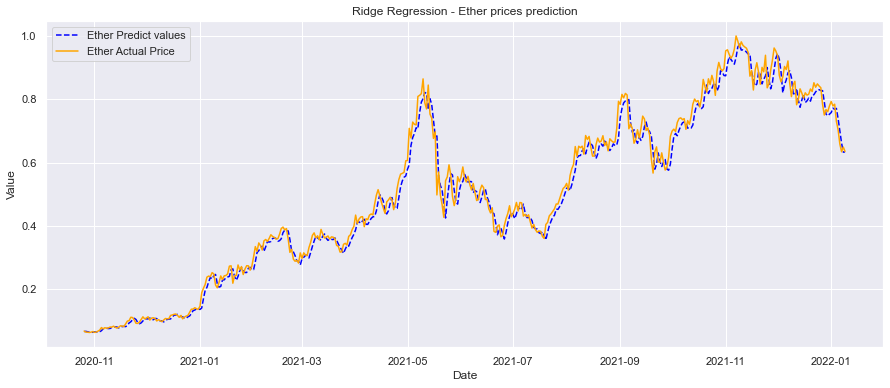

In [82]:
plt.figure(figsize=(15,6))

date_range = df_ridget_eth.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='Ether Predict values')
plt.plot(date_range, y_test, color='orange', label='Ether Actual Price')
plt.title('Ridge Regression - Ether prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [83]:
#Ether com alpha= 0.5

#Aplicando Ridge regression
model = Ridge(alpha=0.5)
model.fit(x_train, y_train)

# Teste de predição
predict_values = model.predict(x_test)

In [84]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : 'Ridge Regression alpha = 0.5', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_eth = df_score_eth.append(score_data, ignore_index=True)
df_score_eth

MSE: 0.002358671201844622
RMSE: 0.04856615284171294
MAE: 0.03757402285985509
MAPE: 0.07458805698333577


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001080,0.032863,0.023794,0.049331
1,Ridge Regression alpha = 0.5,0.002359,0.048566,0.037574,0.074588


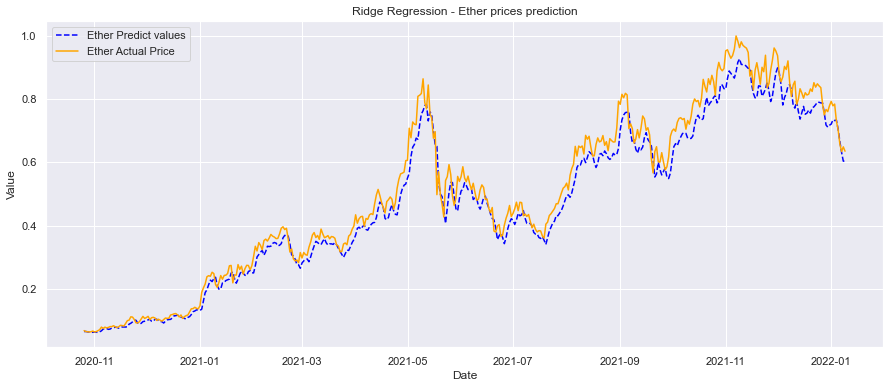

In [85]:
plt.figure(figsize=(15,6))

date_range = df_ridget_eth.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='Ether Predict values')
plt.plot(date_range, y_test, color='orange', label='Ether Actual Price')
plt.title('Ridge Regression - Ether prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [86]:
#Ether com alpha= 1.0

#Aplicando Ridge regression
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

# Teste de predição
predict_values = model.predict(x_test)

#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : 'Ridge Regression alpha = 1.0', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_eth = df_score_eth.append(score_data, ignore_index=True)
df_score_eth

MSE: 0.005356122745241129
RMSE: 0.07318553644840713
MAE: 0.06012187981981903
MAPE: 0.11662606214914843


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001080,0.032863,0.023794,0.049331
1,Ridge Regression alpha = 0.5,0.002359,0.048566,0.037574,0.074588
2,Ridge Regression alpha = 1.0,0.005356,0.073186,0.060122,0.116626


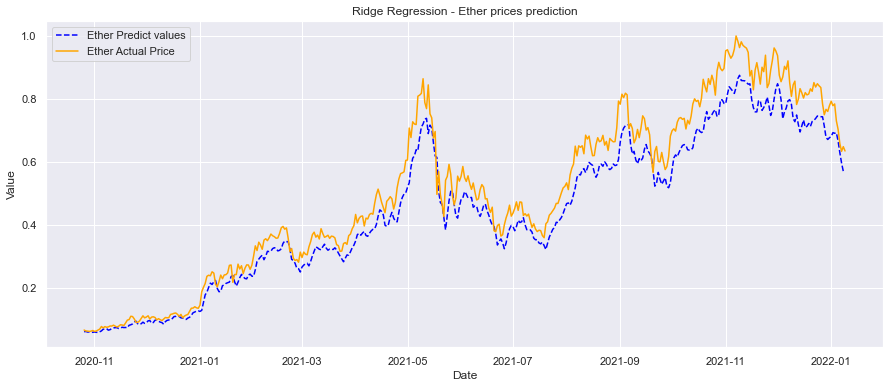

In [87]:
plt.figure(figsize=(15,6))

date_range = df_ridget_eth.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='Ether Predict values')
plt.plot(date_range, y_test, color='orange', label='Ether Actual Price')
plt.title('Ridge Regression - Ether prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [88]:
#Ether com alpha= 2.0

#Aplicando Ridge regression
model = Ridge(alpha=2.0)
model.fit(x_train, y_train)

# Teste de predição
predict_values = model.predict(x_test)

In [89]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : 'Ridge Regression alpha = 2.0', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_eth = df_score_eth.append(score_data, ignore_index=True)
df_score_eth

MSE: 0.014078861539879358
RMSE: 0.118654378511201
MAE: 0.10157089155955464
MAPE: 0.19516912598542369


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001080,0.032863,0.023794,0.049331
1,Ridge Regression alpha = 0.5,0.002359,0.048566,0.037574,0.074588
2,Ridge Regression alpha = 1.0,0.005356,0.073186,0.060122,0.116626
3,Ridge Regression alpha = 2.0,0.014079,0.118654,0.101571,0.195169


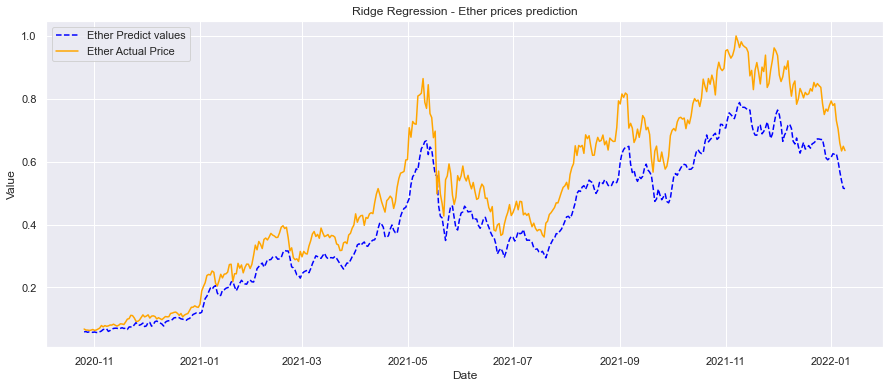

In [90]:
plt.figure(figsize=(15,6))

date_range = df_ridget_eth.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='Ether Predict values')
plt.plot(date_range, y_test, color='orange', label='Ether Actual Price')
plt.title('Ridge Regression - Ether prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [91]:
#-----------------------------MODELO: LSTM ------------------------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

#Reutilizando o dataset df_ridget_btc que possui a coluna target
#Separando as colunas necessárias, apenas Ultimo e Target
df_LSTM = df_ridget_btc[['Ultimo', 'Target']]
df_LSTM

,Ultimo,Target
Data,,
2018-01-01,13444.9,14754.1
2018-01-02,14754.1,15156.6
2018-01-03,15156.6,15180.1
2018-01-04,15180.1,16954.8
2018-01-05,16954.8,17172.3
...,...,...
2022-01-05,43425.9,43097.5
2022-01-06,43097.5,41546.7
2022-01-07,41546.7,41672.0


In [92]:
#Aplicando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_LSTM)
scaled_data

array([[0.15888534, 0.1792464 ],
       [0.1792464 , 0.1855062 ],
       [0.1855062 , 0.18587167],
       ...,
       [0.59593276, 0.59788147],
       [0.59788147, 0.60062334],
       [0.60062334, 0.60037294]])

In [93]:
# Separando os valores e deixando em y o valor do dia posterior
x = scaled_data[:,0]
y = scaled_data[:,1]

x.shape, y.shape, df_LSTM.shape

((1470,), (1470,), (1470, 2))

In [94]:
#dividir em treino e teste
len_split= int(len(df_LSTM)*0.7)
x_train = x[:len_split]
y_train = y[:len_split]

x_test = x[len_split:]
y_test = y[len_split:]

x_train = np.reshape(x_train, (x_train.shape[0], 1, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 1, 1))
x_train.shape, x_test.shape

((1029, 1, 1), (441, 1, 1))

In [95]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [96]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
15/15 [==============================] - 6s 100ms/step - loss: 0.0035 - val_loss: 0.0039
Epoch 2/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 9.9598e-04 - val_loss: 0.0018
Epoch 8/10
15/15 [==============================] - 0s 7ms/step - loss: 7.4972e-04 - val_loss: 0.0016
Epoch 9/10
15/15 [==============================] - 0s 6ms/step - loss: 4.0815e-04 - val_loss: 4.4200e-04
Epoch 10/10
15/15 [==============================] - 0s 8ms/step - loss: 1.4740e-04 - val_loss: 1.92

In [97]:
predict_values = model.predict(x_test)

In [98]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : f'LSTM epochs=10, batch_size=64', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_btc = df_score_btc.append(score_data, ignore_index=True)
df_score_btc

MSE: 0.000784508743917948
RMSE: 0.028009083239512643
MAE: 0.02076391914361593
MAPE: 0.03481408479384533


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001168,0.034178,0.026642,0.043407
1,Ridge Regression alpha = 0.5,0.003786,0.061532,0.052288,0.082215
2,Ridge Regression alpha = 1.0,0.009580,0.097876,0.087813,0.136900
3,Ridge Regression alpha = 2.0,0.025226,0.158828,0.145967,0.227040
4,"LSTM epochs=10, batch_size=64",0.000785,0.028009,0.020764,0.034814


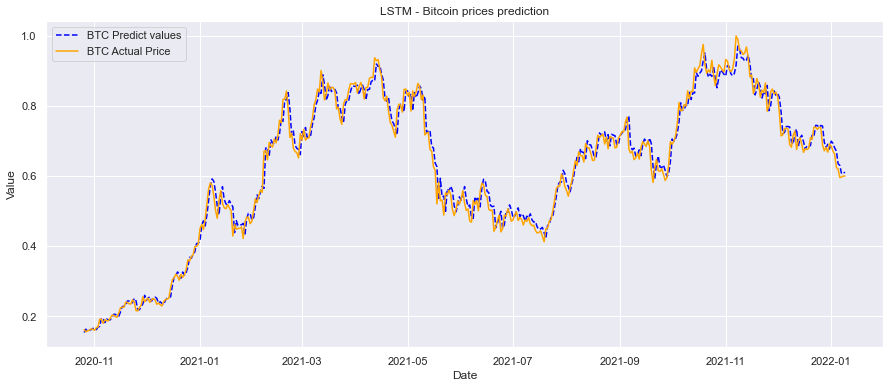

In [99]:
plt.figure(figsize=(15,6))

date_range = df_LSTM.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='BTC Predict values')
plt.plot(date_range, y_test, color='orange', label='BTC Actual Price')
plt.title('LSTM - Bitcoin prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [100]:
#Testando com epochs = 20
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1)
predict_values = model.predict(x_test)

Epoch 1/20
15/15 [==============================] - 0s 9ms/step - loss: 1.1804e-04 - val_loss: 1.9316e-05
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 9.9231e-05 - val_loss: 5.6756e-05
Epoch 3/20
15/15 [==============================] - 0s 7ms/step - loss: 9.8082e-05 - val_loss: 3.3355e-05
Epoch 4/20
15/15 [==============================] - 0s 7ms/step - loss: 8.8569e-05 - val_loss: 2.0479e-05
Epoch 5/20
15/15 [==============================] - 0s 7ms/step - loss: 9.6632e-05 - val_loss: 2.6354e-05
Epoch 6/20
15/15 [==============================] - 0s 7ms/step - loss: 8.8835e-05 - val_loss: 3.0467e-05
Epoch 7/20
15/15 [==============================] - 0s 7ms/step - loss: 8.4214e-05 - val_loss: 2.5108e-05
Epoch 8/20
15/15 [==============================] - 0s 7ms/step - loss: 8.7016e-05 - val_loss: 3.1219e-05
Epoch 9/20
15/15 [==============================] - 0s 8ms/step - loss: 8.6214e-05 - val_loss: 2.3814e-05
Epoch 10/20
15/15 [===========================

In [101]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : f'LSTM epochs=20, batch_size=64', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_btc = df_score_btc.append(score_data, ignore_index=True)
df_score_btc

MSE: 0.0019580725837791096
RMSE: 0.044250113940860196
MAE: 0.034553146827344706
MAPE: 0.052190122497564814


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001168,0.034178,0.026642,0.043407
1,Ridge Regression alpha = 0.5,0.003786,0.061532,0.052288,0.082215
2,Ridge Regression alpha = 1.0,0.009580,0.097876,0.087813,0.136900
3,Ridge Regression alpha = 2.0,0.025226,0.158828,0.145967,0.227040
4,"LSTM epochs=10, batch_size=64",0.000785,0.028009,0.020764,0.034814
5,"LSTM epochs=20, batch_size=64",0.001958,0.044250,0.034553,0.052190


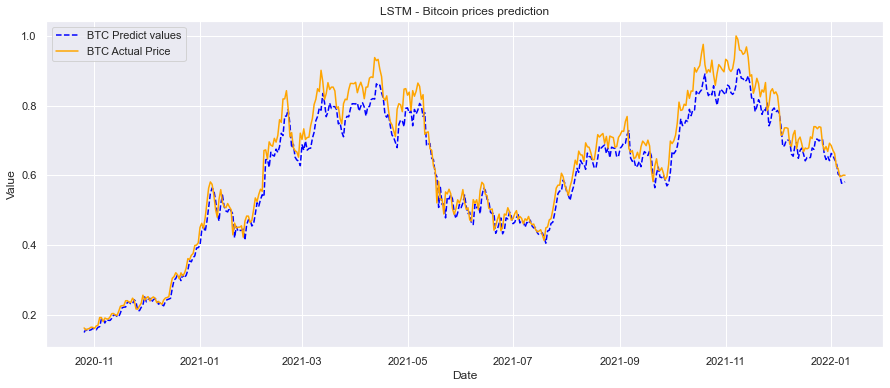

In [102]:
plt.figure(figsize=(15,6))

date_range = df_LSTM.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='BTC Predict values')
plt.plot(date_range, y_test, color='orange', label='BTC Actual Price')
plt.title('LSTM - Bitcoin prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [103]:
#--------LSTM para Ether---------#
#Duas colunas para trabalhar o modelo LSTM
df_LSTM = df_ridget_eth[['Ultimo', 'Target']]

#Aplicando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_LSTM)
scaled_data

# Separando os valores e deixando em y o valor do dia posterior
x = scaled_data[:,0]
y = scaled_data[:,1]

x.shape, y.shape, df_LSTM.shape

#Dividindo em teste e treino
len_split= int(len(df_LSTM)*0.7)
x_train = x[:len_split]
y_train = y[:len_split]

x_test = x[len_split:]
y_test = y[len_split:]

x_train = np.reshape(x_train, (x_train.shape[0], 1, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 1, 1))
x_train.shape, x_test.shape


((1029, 1, 1), (441, 1, 1))

In [104]:
#Configurando o modelo
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

#Treinando o modelo
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
15/15 [==============================] - 7s 79ms/step - loss: 0.0034 - val_loss: 3.1472e-04
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0025 - val_loss: 1.5683e-04
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 3.1679e-04
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 2.0069e-04
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 1.7569e-04
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 3.9634e-05
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 4.7660e-04 - val_loss: 2.7713e-05
Epoch 8/10
15/15 [==============================] - 0s 8ms/step - loss: 1.7729e-04 - val_loss: 1.4390e-05
Epoch 9/10
15/15 [==============================] - 0s 8ms/step - loss: 1.4694e-04 - val_loss: 7.9863e-05
Epoch 10/10
15/15 [==============================] - 0s 8ms/step - l

In [105]:
#Fazendo a predição dos dados
predict_values = model.predict(x_test)

In [106]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : f'LSTM epochs=10, batch_size=64', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_eth = df_score_eth.append(score_data, ignore_index=True)
df_score_eth

MSE: 0.003223757838822171
RMSE: 0.05677814578534747
MAE: 0.043324020294601105
MAPE: 0.08069743536161601


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001080,0.032863,0.023794,0.049331
1,Ridge Regression alpha = 0.5,0.002359,0.048566,0.037574,0.074588
2,Ridge Regression alpha = 1.0,0.005356,0.073186,0.060122,0.116626
3,Ridge Regression alpha = 2.0,0.014079,0.118654,0.101571,0.195169
4,"LSTM epochs=10, batch_size=64",0.003224,0.056778,0.043324,0.080697


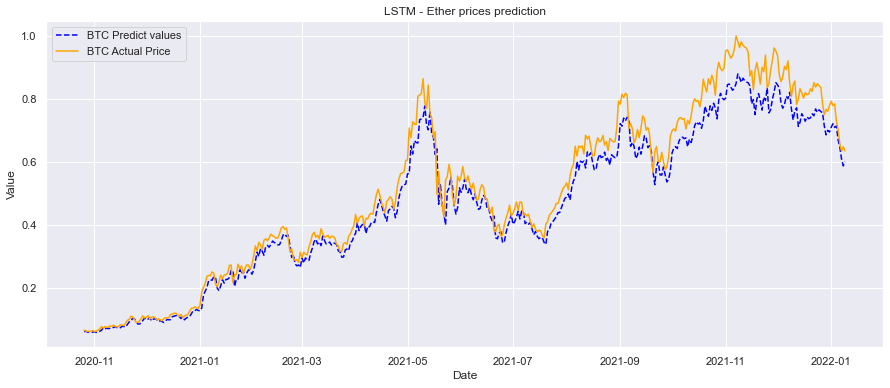

In [107]:
plt.figure(figsize=(15,6))

date_range = df_LSTM.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='BTC Predict values')
plt.plot(date_range, y_test, color='orange', label='BTC Actual Price')
plt.title('LSTM - Ether prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [108]:
#Trocando de 10 para 20
model.fit(x_train, y_train, epochs=15, batch_size=60, validation_split=0.1)

Epoch 1/15
16/16 [==============================] - 0s 9ms/step - loss: 1.1199e-04 - val_loss: 1.1974e-05
Epoch 2/15
16/16 [==============================] - 0s 7ms/step - loss: 1.1079e-04 - val_loss: 1.2279e-05
Epoch 3/15
16/16 [==============================] - 0s 7ms/step - loss: 1.1837e-04 - val_loss: 2.0946e-05
Epoch 4/15
16/16 [==============================] - 0s 7ms/step - loss: 1.2571e-04 - val_loss: 1.6376e-05
Epoch 5/15
16/16 [==============================] - 0s 7ms/step - loss: 9.7670e-05 - val_loss: 1.6624e-05
Epoch 6/15
16/16 [==============================] - 0s 8ms/step - loss: 1.2055e-04 - val_loss: 1.0908e-05
Epoch 7/15
16/16 [==============================] - 0s 7ms/step - loss: 1.0036e-04 - val_loss: 1.1448e-05
Epoch 8/15
16/16 [==============================] - 0s 7ms/step - loss: 1.0830e-04 - val_loss: 1.6109e-05
Epoch 9/15
16/16 [==============================] - 0s 7ms/step - loss: 1.1352e-04 - val_loss: 1.3786e-05
Epoch 10/15
16/16 [===========================

In [109]:
#Fazendo a predição dos dados
predict_values = model.predict(x_test)

In [110]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=y_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=y_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : f'LSTM epochs=15, batch_size=60', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_eth = df_score_eth.append(score_data, ignore_index=True)
df_score_eth

MSE: 0.002803527581136332
RMSE: 0.05294834823803602
MAE: 0.03740847544365606
MAPE: 0.06408279363056961


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001080,0.032863,0.023794,0.049331
1,Ridge Regression alpha = 0.5,0.002359,0.048566,0.037574,0.074588
2,Ridge Regression alpha = 1.0,0.005356,0.073186,0.060122,0.116626
3,Ridge Regression alpha = 2.0,0.014079,0.118654,0.101571,0.195169
4,"LSTM epochs=10, batch_size=64",0.003224,0.056778,0.043324,0.080697
5,"LSTM epochs=15, batch_size=60",0.002804,0.052948,0.037408,0.064083


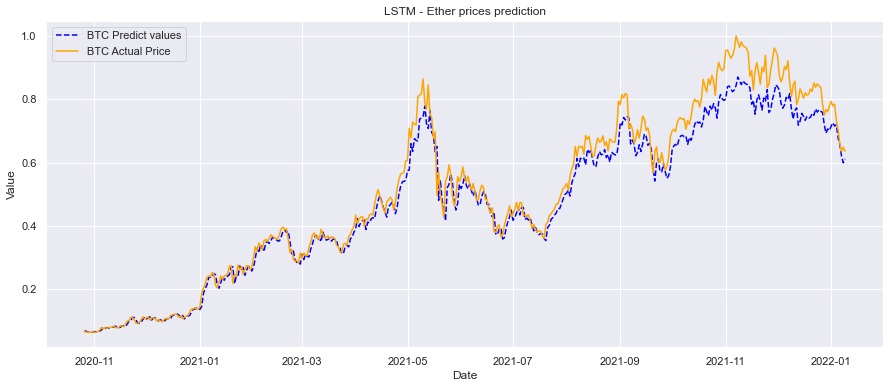

In [111]:
plt.figure(figsize=(15,6))

date_range = df_LSTM.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='BTC Predict values')
plt.plot(date_range, y_test, color='orange', label='BTC Actual Price')
plt.title('LSTM - Ether prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [112]:
#----------------------------------------------FIM LSTM----------------------------------------------#

In [113]:
##-------------------------MODELO: ARIMA---------------------##
import math

#Dividir em treino e teste 70% e 30%
#Train test split
len_split = int(len(bitcoin_Dolar_2018_2022)*0.7)

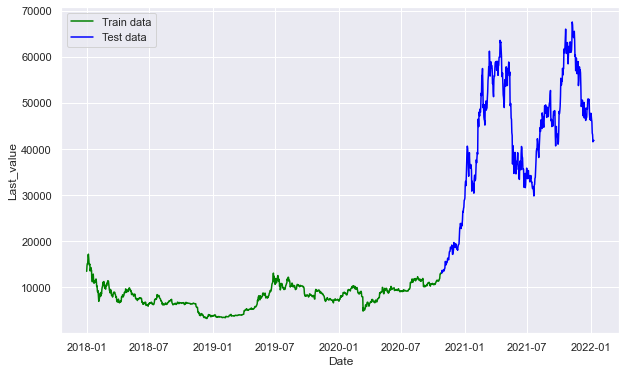

In [114]:
#split data into train and testing set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Last_value')
plt.plot(bitcoin_Dolar_2018_2022[0:len_split]['Ultimo'], 'green', label='Train data')
plt.plot(bitcoin_Dolar_2018_2022[len_split:]['Ultimo'], 'blue', label='Test data' )
plt.legend()

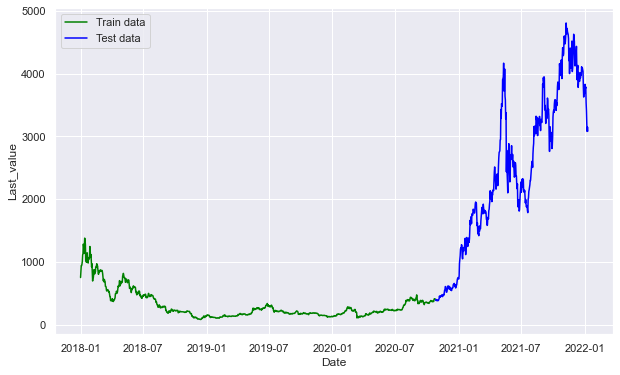

In [115]:
#split data into train and testing set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Last_value')
plt.plot(ether_Dolar_2018_2022[0:len_split]['Ultimo'], 'green', label='Train data')
plt.plot(ether_Dolar_2018_2022[len_split:]['Ultimo'], 'blue', label='Test data' )
plt.legend()

In [146]:
#------------MODELO: ARIMA-----------#
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
#Separando os dados em teste e treino 70/30
len_split = int(len(bitcoin_Dolar_2018_2022)*0.7)
x = bitcoin_Dolar_2018_2022[['Ultimo']]

#Aplicando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x)

x_train = scaled_data[:len_split]
x_test = scaled_data[len_split:]

x_real_train = x[:len_split]
x_real_test = x[len_split:]

x_train.shape, x_test.shape, x_real_train


((1029, 1),
 (442, 1),
              Ultimo
 Data               
 2018-01-01  13444.9
 2018-01-02  14754.1
 2018-01-03  15156.6
 2018-01-04  15180.1
 2018-01-05  16954.8
 ...             ...
 2020-10-21  12808.7
 2020-10-22  12974.6
 2020-10-23  12934.1
 2020-10-24  13117.2
 2020-10-25  13032.2
 
 [1029 rows x 1 columns])

In [147]:
#Guardando na variável history
history = list(x_train[:,0])
history

history_real = list(x_real_train.Ultimo)

In [148]:
#Criando best parameters
from itertools import product
p = range(0,4)
d = range(0,4)
q = range(0,4)
candidate_parameters = product(p,d,q)

best_aic = float('inf')

for param in candidate_parameters:
    try:
        model = ARIMA(history, order=param)
        model_fit = model.fit()
    except :
        continue
    aic_temp = model_fit.aic
    if aic_temp < best_aic:
        best_aic = aic_temp
        best_param = param
best_param


(1, 1, 0)

In [149]:
#Criando lista com os valores preditos
predict_values = list()
history = list(x_train[:,0])

for i in range(len(x_test)):
    model = ARIMA(history, order = best_param)
    model_fit = model.fit()
    predict_value = model_fit.forecast()[0]
    #Alimenta o history com o valor real para que vá se ajustando
    history.append(x_test[i,0])
    predict_values.append(predict_value)


In [150]:
# history = list(x_real_train.Ultimo)
# #Criando best parameters
# from itertools import product
# p = range(0,4)
# d = range(0,4)
# q = range(0,4)
# candidate_parameters = product(p,d,q)

# best_aic = float('inf')

# for param in candidate_parameters:
#     try:
#         model = ARIMA(history_real, order=param)
#         model_fit = model.fit()
#     except :
#         continue
#     aic_temp = model_fit.aic
#     if aic_temp < best_aic:
#         best_aic = aic_temp
#         best_param = param
# best_param

In [151]:
# #Criando lista com os valores preditos
# predict_real_values = list()
# history_real = list(x_real_train.Ultimo)

# for i in range(len(x_real_test)):
#     model = ARIMA(history_real, order = best_param)
#     model_fit = model.fit()
#     predict_real_value = model_fit.forecast()[0]
#     #Alimenta o history com o valor real para que vá se ajustando
#     history_real.append(x_real_test.Ultimo[i])
#     predict_real_values.append(predict_real_value)

In [152]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=x_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=x_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=x_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=x_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : f'ARIMA param: {best_param}', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_btc = df_score_btc.append(score_data, ignore_index=True)
df_score_btc

MSE: 0.0007626602866032592
RMSE: 0.027616304723899233
MAE: 0.019894761288343155
MAPE: 0.03327760618217504


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001168,0.034178,0.026642,0.043407
1,Ridge Regression alpha = 0.5,0.003786,0.061532,0.052288,0.082215
2,Ridge Regression alpha = 1.0,0.009580,0.097876,0.087813,0.136900
3,Ridge Regression alpha = 2.0,0.025226,0.158828,0.145967,0.227040
4,"LSTM epochs=10, batch_size=64",0.000785,0.028009,0.020764,0.034814
5,"LSTM epochs=20, batch_size=64",0.001958,0.044250,0.034553,0.052190
6,"ARIMA param: (1, 1, 0)",0.000763,0.027616,0.019895,0.033278
7,"ARIMA param: (1,1,1))",0.000768,0.027721,0.020011,0.033474
8,"ARIMA param: (0,1,0))",0.000760,0.027575,0.019950,0.033322
9,"ARIMA param: (1, 1, 0)",0.000763,0.027616,0.019895,0.033278


In [153]:
#Revert values
predic_arr = np.asarray(predict_values)
predict_reverse_value = scaler.inverse_transform(predic_arr.reshape(-1,1))
real_reverse_values = scaler.inverse_transform(x_test)

# #Calculando os erros
# mse = metrics.mean_squared_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# rmse = metrics.mean_squared_error(y_true=real_reverse_values, y_pred= predict_reverse_value, squared=False)
# mae = metrics.mean_absolute_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# mape = metrics.mean_absolute_percentage_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# print(f'MSE: {mse}')
# print(f'RMSE: {rmse}')
# print(f'MAE: {mae}')
# print(f'MAPE: {mape}')
# score_data = {'Model' : f'ARIMA reverted param: {best_param}', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
# df_score_btc = df_score_btc.append(score_data, ignore_index=True)
# df_score_btc


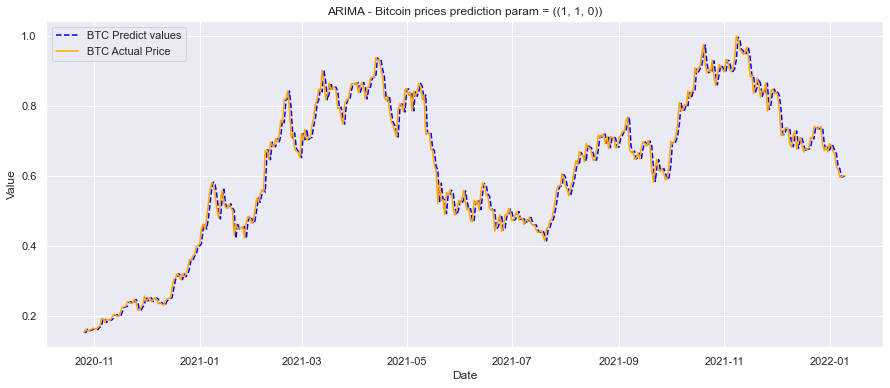

In [154]:
plt.figure(figsize=(15,6))
plt.grid(True)

date_range = bitcoin_Dolar_2018_2022[len_split:].index

plt.plot(date_range, predict_values, color = 'blue' ,linestyle= 'dashed', label='BTC Predict values')
plt.plot(date_range, x_test, color='orange', label='BTC Actual Price')
plt.title(f'ARIMA - Bitcoin prices prediction param = ({best_param})')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [155]:
#Criando lista com os valores preditos
predict_values = list()
history = list(x_train[:,0])
aic = float('inf')
for i in range(len(x_test)):
    model = ARIMA(history, order = (1,1,1))
    model_fit = model.fit()
    if(model_fit.aic < aic):
        aic = model_fit.aic
    predict_value = model_fit.forecast()[0]
    #Alimenta o history com o valor real para que vá se ajustando
    history.append(x_test[i,0])
    predict_values.append(predict_value)

In [156]:
print(f'ARIMA({best_param}) -> AIC: {best_aic}')
print(f'ARIMA(1,1,1) -> AIC: {aic}')

ARIMA((1, 1, 0)) -> AIC: -7819.8716604578
ARIMA(1,1,1) -> AIC: -8141.702239216069


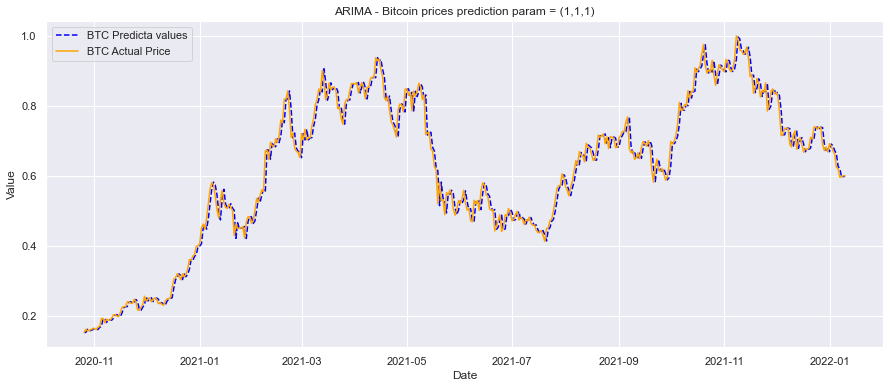

In [157]:
plt.figure(figsize=(15,6))
plt.grid(True)

date_range = bitcoin_Dolar_2018_2022[len_split:].index

plt.plot(date_range, predict_values, color = 'blue' ,linestyle= 'dashed', label='BTC Predicta values')
plt.plot(date_range, x_test, color='orange', label='BTC Actual Price')
plt.title(f'ARIMA - Bitcoin prices prediction param = (1,1,1)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [158]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=x_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=x_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=x_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=x_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : f'ARIMA param: (1,1,1))', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_btc = df_score_btc.append(score_data, ignore_index=True)
df_score_btc

MSE: 0.0007684533780038764
RMSE: 0.027720991648999074
MAE: 0.020011436609180783
MAPE: 0.03347435182042306


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001168,0.034178,0.026642,0.043407
1,Ridge Regression alpha = 0.5,0.003786,0.061532,0.052288,0.082215
2,Ridge Regression alpha = 1.0,0.009580,0.097876,0.087813,0.136900
3,Ridge Regression alpha = 2.0,0.025226,0.158828,0.145967,0.227040
4,"LSTM epochs=10, batch_size=64",0.000785,0.028009,0.020764,0.034814
5,"LSTM epochs=20, batch_size=64",0.001958,0.044250,0.034553,0.052190
6,"ARIMA param: (1, 1, 0)",0.000763,0.027616,0.019895,0.033278
7,"ARIMA param: (1,1,1))",0.000768,0.027721,0.020011,0.033474
8,"ARIMA param: (0,1,0))",0.000760,0.027575,0.019950,0.033322
9,"ARIMA param: (1, 1, 0)",0.000763,0.027616,0.019895,0.033278


In [159]:
#Revert values
predic_arr = np.asarray(predict_values)
predict_reverse_value = scaler.inverse_transform(predic_arr.reshape(-1,1))
real_reverse_values = scaler.inverse_transform(x_test)

#Calculando os erros
# mse = metrics.mean_squared_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# rmse = metrics.mean_squared_error(y_true=real_reverse_values, y_pred= predict_reverse_value, squared=False)
# mae = metrics.mean_absolute_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# mape = metrics.mean_absolute_percentage_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# print(f'MSE: {mse}')
# print(f'RMSE: {rmse}')
# print(f'MAE: {mae}')
# print(f'MAPE: {mape}')
# score_data = {'Model' : f'ARIMA reverted param: (1,1,1)', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
# df_score_btc = df_score_btc.append(score_data, ignore_index=True)
# df_score_btc


In [160]:
#Criando lista com os valores preditos
predict_values = list()
history = list(x_train[:,0])
aic = float('inf')
for i in range(len(x_test)):
    model = ARIMA(history, order = (0,1,0))
    model_fit = model.fit()
    if(model_fit.aic < aic):
        aic = model_fit.aic
    predict_value = model_fit.forecast()[0]
    #Alimenta o history com o valor real para que vá se ajustando
    history.append(x_test[i,0])
    predict_values.append(predict_value)

In [161]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=x_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=x_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=x_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=x_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : f'ARIMA param: (0,1,0))', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_btc = df_score_btc.append(score_data, ignore_index=True)
df_score_btc

MSE: 0.0007603788228700765
RMSE: 0.02757496732310079
MAE: 0.01994955962098907
MAPE: 0.03332185885479815


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001168,0.034178,0.026642,0.043407
1,Ridge Regression alpha = 0.5,0.003786,0.061532,0.052288,0.082215
2,Ridge Regression alpha = 1.0,0.009580,0.097876,0.087813,0.136900
3,Ridge Regression alpha = 2.0,0.025226,0.158828,0.145967,0.227040
4,"LSTM epochs=10, batch_size=64",0.000785,0.028009,0.020764,0.034814
5,"LSTM epochs=20, batch_size=64",0.001958,0.044250,0.034553,0.052190
6,"ARIMA param: (1, 1, 0)",0.000763,0.027616,0.019895,0.033278
7,"ARIMA param: (1,1,1))",0.000768,0.027721,0.020011,0.033474
8,"ARIMA param: (0,1,0))",0.000760,0.027575,0.019950,0.033322
9,"ARIMA param: (1, 1, 0)",0.000763,0.027616,0.019895,0.033278


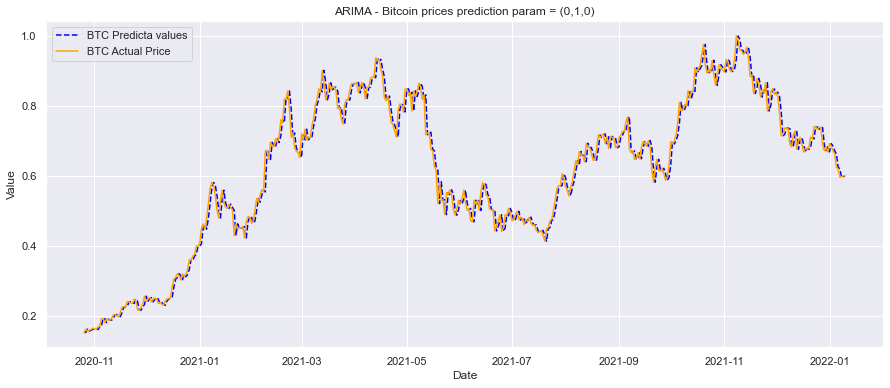

In [162]:
plt.figure(figsize=(15,6))
plt.grid(True)

date_range = bitcoin_Dolar_2018_2022[len_split:].index

plt.plot(date_range, predict_values, color = 'blue' ,linestyle= 'dashed', label='BTC Predicta values')
plt.plot(date_range, x_test, color='orange', label='BTC Actual Price')
plt.title(f'ARIMA - Bitcoin prices prediction param = (0,1,0)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [163]:
#--------------ARIMA para Ether--------------#

#Separando os dados em teste e treino 70/30
len_split = int(len(ether_Dolar_2018_2022)*0.7)

x = ether_Dolar_2018_2022[['Ultimo']]

#Aplicando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x)

x_train = scaled_data[:len_split]
x_test = scaled_data[len_split:]

#Guardando na variável history
#variavel que permite o controle dos dados de forma que a vamos treinando e testando com os dados seguintes
history = list(x_train[:,0])

#Criando lista com os valores preditos
predict_values = list()

#Criando best parameters
from itertools import product
p = range(0,4)
d = range(0,4)
q = range(0,4)
candidate_parameters = product(p,d,q)

best_aic = float('inf')

for param in candidate_parameters:
    try:
        model = ARIMA(history, order=param)
        model_fit = model.fit()
    except :
        continue
    aic_temp = model_fit.aic
    if aic_temp < best_aic:
        best_aic = aic_temp
        best_param = param
best_param

(3, 1, 3)

In [164]:
#Criando lista com os valores preditos
predict_values = list()
history = list(x_train[:,0])
#Aplicando o modelo
for i in range(len(x_test)):
    model = ARIMA(history, order = best_param)
    model_fit = model.fit()
    predict_value = model_fit.forecast()[0]
    #Alimenta o history com o valor real para que vá se ajustando
    history.append(x_test[i,0])
    predict_values.append(predict_value)

In [165]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=x_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=x_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=x_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=x_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : f'ARIMA param: {best_param}', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_eth = df_score_eth.append(score_data, ignore_index=True)
df_score_eth

MSE: 0.0009125800956117671
RMSE: 0.030208940656894393
MAE: 0.020588762412847676
MAPE: 0.04362188124765572


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001080,0.032863,0.023794,0.049331
1,Ridge Regression alpha = 0.5,0.002359,0.048566,0.037574,0.074588
2,Ridge Regression alpha = 1.0,0.005356,0.073186,0.060122,0.116626
3,Ridge Regression alpha = 2.0,0.014079,0.118654,0.101571,0.195169
4,"LSTM epochs=10, batch_size=64",0.003224,0.056778,0.043324,0.080697
5,"LSTM epochs=15, batch_size=60",0.002804,0.052948,0.037408,0.064083
6,"ARIMA param: (3, 1, 3)",0.000913,0.030209,0.020589,0.043622
7,"ARIMA param: (1,1,1))",0.000860,0.029331,0.020001,0.042569
8,"ARIMA param: (0,1,0))",0.000865,0.029404,0.020176,0.042726
9,"ARIMA param: (3, 1, 3)",0.000913,0.030209,0.020589,0.043622


In [166]:
#Revert values
predic_arr = np.asarray(predict_values)
predict_reverse_value = scaler.inverse_transform(predic_arr.reshape(-1,1))
real_reverse_values = scaler.inverse_transform(x_test)

# #Calculando os erros
# mse = metrics.mean_squared_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# rmse = metrics.mean_squared_error(y_true=real_reverse_values, y_pred= predict_reverse_value, squared=False)
# mae = metrics.mean_absolute_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# mape = metrics.mean_absolute_percentage_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# print(f'MSE: {mse}')
# print(f'RMSE: {rmse}')
# print(f'MAE: {mae}')
# print(f'MAPE: {mape}')
# score_data = {'Model' : f'ARIMA reverted param: {best_param}', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
# df_score_eth = df_score_eth.append(score_data, ignore_index=True)
# df_score_eth


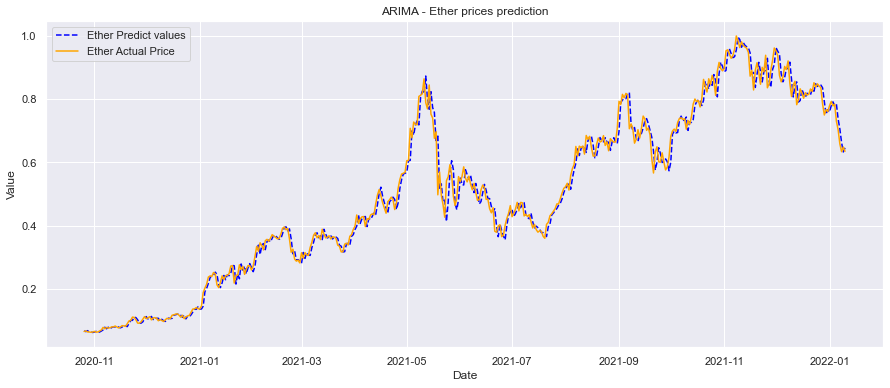

In [167]:
plt.figure(figsize=(15,6))

date_range = ether_Dolar_2018_2022.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='Ether Predict values')
plt.plot(date_range, x_test, color='orange', label='Ether Actual Price')
plt.title('ARIMA - Ether prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# plt.figure(figsize=(15,6))

# date_range = ether_Dolar_2018_2022.index[len_split:]

# plt.plot(date_range, predict_reverse_value, color='blue', linestyle= 'dashed', label='Ether Predict values')
# plt.plot(date_range, real_reverse_values, color='orange', label='Ether Actual Price')
# plt.title('ARIMA - Ether prices prediction')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [168]:
#Utilizando parametro (1,1,1)
predict_values = list()
history = list(x_train[:,0])
aic = float('inf')
for i in range(len(x_test)):
    model = ARIMA(history, order = (1,1,1))
    model_fit = model.fit()
    if(model_fit.aic < aic):
        aic = model_fit.aic
    predict_value = model_fit.forecast()[0]
    #Alimenta o history com o valor real para que vá se ajustando
    history.append(x_test[i,0])
    predict_values.append(predict_value)

In [169]:
print(f'ARIMA{best_param} -> AIC: {best_aic}')
print(f'ARIMA(1,1,1) -> AIC: {aic}')

ARIMA(3, 1, 3) -> AIC: -7997.060796349417
ARIMA(1,1,1) -> AIC: -8507.97234852751


In [170]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=x_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=x_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=x_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=x_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : f'ARIMA param: (1,1,1))', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_eth = df_score_eth.append(score_data, ignore_index=True)
df_score_eth

MSE: 0.0008603091964070317
RMSE: 0.029331027878460578
MAE: 0.020000927266315836
MAPE: 0.042569191371086196


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001080,0.032863,0.023794,0.049331
1,Ridge Regression alpha = 0.5,0.002359,0.048566,0.037574,0.074588
2,Ridge Regression alpha = 1.0,0.005356,0.073186,0.060122,0.116626
3,Ridge Regression alpha = 2.0,0.014079,0.118654,0.101571,0.195169
4,"LSTM epochs=10, batch_size=64",0.003224,0.056778,0.043324,0.080697
5,"LSTM epochs=15, batch_size=60",0.002804,0.052948,0.037408,0.064083
6,"ARIMA param: (3, 1, 3)",0.000913,0.030209,0.020589,0.043622
7,"ARIMA param: (1,1,1))",0.000860,0.029331,0.020001,0.042569
8,"ARIMA param: (0,1,0))",0.000865,0.029404,0.020176,0.042726
9,"ARIMA param: (3, 1, 3)",0.000913,0.030209,0.020589,0.043622


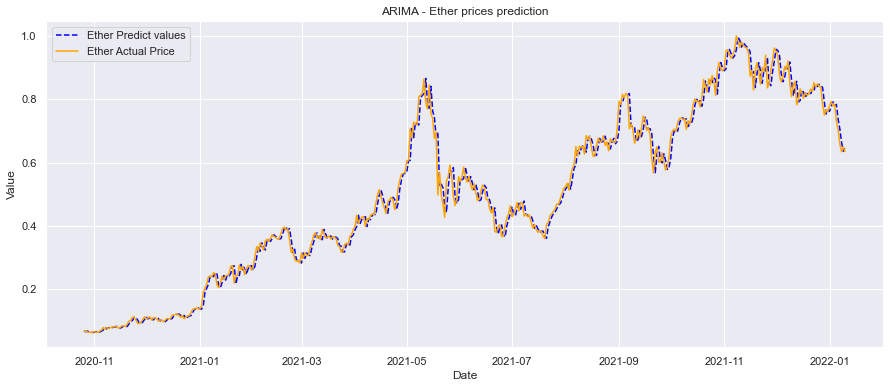

In [171]:
plt.figure(figsize=(15,6))

date_range = ether_Dolar_2018_2022.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='Ether Predict values')
plt.plot(date_range, x_test, color='orange', label='Ether Actual Price')
plt.title('ARIMA - Ether prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [172]:
#Utilizando parametro (0,1,0)
predict_values = list()
history = list(x_train[:,0])
aic = float('inf')
for i in range(len(x_test)):
    model = ARIMA(history, order = (0,1,0))
    model_fit = model.fit()
    if(model_fit.aic < aic):
        aic = model_fit.aic
    predict_value = model_fit.forecast()[0]
    #Alimenta o history com o valor real para que vá se ajustando
    history.append(x_test[i,0])
    predict_values.append(predict_value)

In [173]:
#Calculando os erros
mse = metrics.mean_squared_error(y_true=x_test, y_pred=predict_values)
rmse = metrics.mean_squared_error(y_true=x_test, y_pred= predict_values, squared=False)
mae = metrics.mean_absolute_error(y_true=x_test, y_pred=predict_values)
mape = metrics.mean_absolute_percentage_error(y_true=x_test, y_pred=predict_values)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
score_data = {'Model' : f'ARIMA param: (0,1,0))', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
df_score_eth = df_score_eth.append(score_data, ignore_index=True)
df_score_eth

MSE: 0.0008645718257843282
RMSE: 0.029403602258640492
MAE: 0.02017627173368082
MAPE: 0.042726390967482104


,Model,MSE,RMSE,MAE,MAPE
0,Ridge Regression alpha = 0.1,0.001080,0.032863,0.023794,0.049331
1,Ridge Regression alpha = 0.5,0.002359,0.048566,0.037574,0.074588
2,Ridge Regression alpha = 1.0,0.005356,0.073186,0.060122,0.116626
3,Ridge Regression alpha = 2.0,0.014079,0.118654,0.101571,0.195169
4,"LSTM epochs=10, batch_size=64",0.003224,0.056778,0.043324,0.080697
5,"LSTM epochs=15, batch_size=60",0.002804,0.052948,0.037408,0.064083
6,"ARIMA param: (3, 1, 3)",0.000913,0.030209,0.020589,0.043622
7,"ARIMA param: (1,1,1))",0.000860,0.029331,0.020001,0.042569
8,"ARIMA param: (0,1,0))",0.000865,0.029404,0.020176,0.042726
9,"ARIMA param: (3, 1, 3)",0.000913,0.030209,0.020589,0.043622


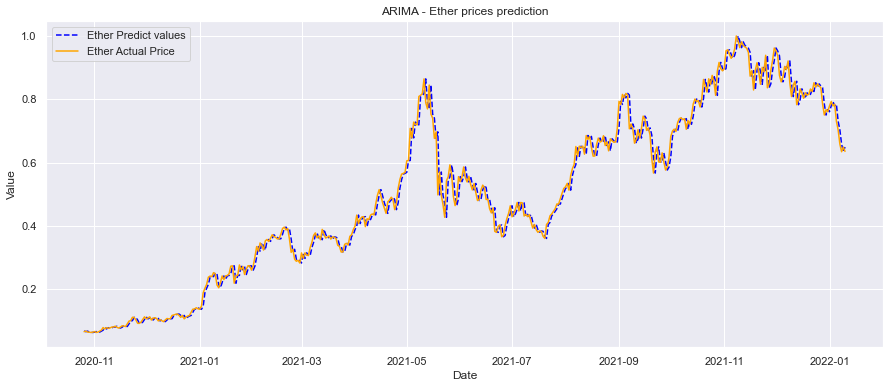

In [174]:
plt.figure(figsize=(15,6))

date_range = ether_Dolar_2018_2022.index[len_split:]

plt.plot(date_range, predict_values, color='blue', linestyle= 'dashed', label='Ether Predict values')
plt.plot(date_range, x_test, color='orange', label='Ether Actual Price')
plt.title('ARIMA - Ether prices prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [175]:
#Revert values
predic_arr = np.asarray(predict_values)
predict_reverse_value = scaler.inverse_transform(predic_arr.reshape(-1,1))
real_reverse_values = scaler.inverse_transform(x_test)

# #Calculando os erros
# mse = metrics.mean_squared_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# rmse = metrics.mean_squared_error(y_true=real_reverse_values, y_pred= predict_reverse_value, squared=False)
# mae = metrics.mean_absolute_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# mape = metrics.mean_absolute_percentage_error(y_true=real_reverse_values, y_pred=predict_reverse_value)
# print(f'MSE: {mse}')
# print(f'RMSE: {rmse}')
# print(f'MAE: {mae}')
# print(f'MAPE: {mape}')
# score_data = {'Model' : f'ARIMA reverted param: (1,1,1)', 'MSE' : mse, 'RMSE' : rmse, 'MAE' : mae, 'MAPE' : mape}
# df_score_eth = df_score_eth.append(score_data, ignore_index=True)
# df_score_eth


ConversionError: Failed to convert value(s) to axis units: 0      Ridge Regression alpha = 0.1
1      Ridge Regression alpha = 0.5
2      Ridge Regression alpha = 1.0
3      Ridge Regression alpha = 2.0
4     LSTM epochs=10, batch_size=64
5     LSTM epochs=20, batch_size=64
6            ARIMA param: (1, 1, 0)
7             ARIMA param: (1,1,1))
8             ARIMA param: (0,1,0))
9            ARIMA param: (1, 1, 0)
10            ARIMA param: (1,1,1))
11            ARIMA param: (0,1,0))
Name: Model, dtype: object

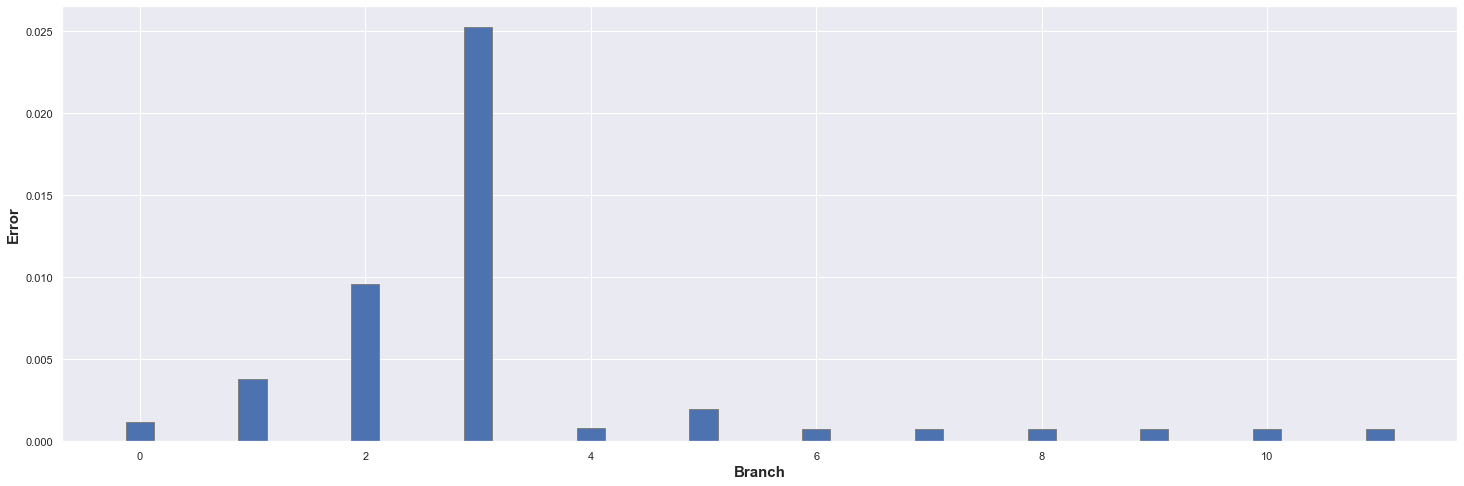

In [216]:
#Bargraph to BTC
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(25, 8))
 
# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(df_score_btc['Model']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, df_score_btc['MSE'], width = barWidth,
        edgecolor ='grey', label ='MSE')
# plt.bar(br2, df_score_btc['RMSE'], width = barWidth,
#         edgecolor ='grey', label ='RMSE')
# plt.bar(br3, df_score_btc['MAE'], width = barWidth,
#         edgecolor ='grey', label ='MAE')
# plt.bar(br3, df_score_btc['MAPE'], width = barWidth,
#         edgecolor ='grey', label ='MAPE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Error', fontweight ='bold', fontsize = 15)
plt.xticks
 
plt.legend()
plt.show()

In [176]:
#----------------Prophet YT--------------------#
from fbprophet import Prophet
len_maior = int(len(bitcoin_Dolar_2018_2022)*0.9)
df_prophet = bitcoin_Dolar_2018_2022[0:len_maior]['Ultimo']
df_test_prophet = bitcoin_Dolar_2018_2022[len_maior:]['Ultimo']
df_test_prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
df_prophet = df_prophet.reset_index()
df_prophet.columns = ['ds', 'y']

In [ ]:
df_prophet

,ds,y
0,2018-01-01,13444.9
1,2018-01-02,14754.1
2,2018-01-03,15156.6
3,2018-01-04,15180.1
4,2018-01-05,16954.8
...,...,...
1318,2021-08-11,45564.3
1319,2021-08-12,44403.4
1320,2021-08-13,47809.1
1321,2021-08-14,47081.5


In [ ]:
model = Prophet()

In [ ]:
# lag_features = ["Minima", "Maxima", "Vol.", "Valor_Dolar"]
# window1 = 3
# window2 = 7
# window3 = 30

# df_rolled_3d = bitcoin_Dolar_2018_2022[lag_features].rolling(window=window1, min_periods=0)
# df_rolled_7d = bitcoin_Dolar_2018_2022[lag_features].rolling(window=window2, min_periods=0)
# df_rolled_30d = bitcoin_Dolar_2018_2022[lag_features].rolling(window=window3, min_periods=0)

# df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
# df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
# df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

# df_std_3d = df_rolled_3d.std().shift(1).reset_index()
# df_std_7d = df_rolled_7d.std().shift(1).reset_index()
# df_std_30d = df_rolled_30d.std().shift(1).reset_index()

# for feature in lag_features:
#     bitcoin_Dolar_2018_2022[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
#     bitcoin_Dolar_2018_2022[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
#     bitcoin_Dolar_2018_2022[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
#     bitcoin_Dolar_2018_2022[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
#     bitcoin_Dolar_2018_2022[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
#     bitcoin_Dolar_2018_2022[f"{feature}_std_lag{window3}"] = df_std_30d[feature]
# bitcoin_Dolar_2018_2022

In [ ]:
bitcoin_Dolar_2018_2022.columns

Index(['Ultimo', 'Abertura', 'Maxima', 'Minima', 'Vol.', 'Valor_Dolar'], dtype='object')

In [ ]:
exogenous_features = [ 'Minima_mean_lag3', 'Minima_mean_lag7', 'Minima_mean_lag30',
       'Minima_std_lag3', 'Minima_std_lag7', 'Minima_std_lag30',
       'Maxima_mean_lag3', 'Maxima_mean_lag7', 'Maxima_mean_lag30',
       'Maxima_std_lag3', 'Maxima_std_lag7', 'Maxima_std_lag30',
       'Vol._mean_lag3', 'Vol._mean_lag7', 'Vol._mean_lag30', 'Vol._std_lag3',
       'Vol._std_lag7', 'Vol._std_lag30', 'Valor_Dolar_mean_lag3',
       'Valor_Dolar_mean_lag7', 'Valor_Dolar_mean_lag30',
       'Valor_Dolar_std_lag3', 'Valor_Dolar_std_lag7',
       'Valor_Dolar_std_lag30']

In [ ]:
for feature in exogenous_features:
    model.add_regressor(feature)

In [ ]:
model.fit(df_prophet)

ValueError: Regressor 'Minima_mean_lag3' missing from dataframe

In [ ]:
df_test_prophet = df_test_prophet.reset_index()
df_test_prophet.columns = ['ds', 'y']

forecast = model.predict(df_test_prophet)

In [ ]:
df_test_prophet['Forecast_Prophet'] = forecast.yhat.values

In [ ]:
fig1 = model.plot(forecast)

In [ ]:
test_mae = mean_absolute_error(df_test_prophet['y'], df_test_prophet['Forecast_Prophet'])
test_rmse = np.sqrt(mean_squared_error(df_test_prophet['y'], df_test_prophet['Forecast_Prophet']))

print(f" Prophet's MAE : {test_mae}")
print(f"Prophet's RMSE : {test_rmse}")

In [ ]:
df_test_prophet[["y", "Forecast_Prophet"]].plot(figsize=(14, 7))

In [ ]:
model.component_modes

In [ ]:
df_prophet.tail()

In [ ]:
future_date = model.make_future_dataframe(periods=len(df_test_prophet))
future_date.tail()

In [ ]:
prediction = model.predict(future_date)
prediction.tail()

In [ ]:
fig = model.plot(prediction)
df_test_prophet.plot(color='green')

In [ ]:
from fbprophet.diagnostics import cross_validation
strlen = str(len(df_test_prophet))
strlen += ' days'
print(strlen)
df_cv = cross_validation(model, horizon= '441 days')
model

In [ ]:
df_cv.tail()

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)

In [ ]:
df_performance

In [ ]:
from fbprophet import plot
fig2 = plot.plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
#-----------------------Exponential Smoothing-------------------#
#O modelo exponencial usa 3 parametros para sua aplicação
#alpha, beta e theta
#Para teste e treinos vamos utilizar a mesma divisão de 70/30, onde 
#70% são para treino e 30% para testes
#Os hiperparametros serão ajustados usando 'validation set'

#Aplicando a divisao 70/30
len_test = int(len(bitcoin_Dolar_2018_2022)*0.7)
train_exp_data = bitcoin_Dolar_2018_2022[0:len_test]['Ultimo']
test_exp_data = bitcoin_Dolar_2018_2022[len_test:]['Ultimo']
train_exp_data

In [ ]:
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
decompose_result = seasonal_decompose(bitcoin_Dolar_2018_2022['Ultimo'], model='multiplicative')
decompose_result.plot()

In [ ]:
fitted_model = ExponentialSmoothing(train_exp_data, trend='mul', 
                                    seasonal='add').fit()
test_predictions = fitted_model.forecast(len(test_exp_data))

In [ ]:
train_exp_data.plot(legend=True, label='Train')
test_exp_data.plot(legend=True, label='Test', figsize=(6,4))
test_predictions.plot(legend=True, label='Predict Value')


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_exp_data,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_exp_data,test_predictions)}')

In [ ]:
#-----------------------------Random Regressor-----------------------#
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

#Adicionando a coluna target com o valor do dia posterior
ether_Dolar_2018_2022['Target'] = ether_Dolar_2018_2022['Ultimo'].shift(-1)
ether_Dolar_2018_2022

In [ ]:
#Excluindo o ultimo valor que não tem target
df_randomForest = ether_Dolar_2018_2022[:-1]
df_randomForest

In [ ]:
x = df_randomForest.drop(columns=['Target', 'Vol.']).values
x.shape
y = df_randomForest['Target'].values
y.shape

In [ ]:
# split_len = int(len(df_randomForest)*0.7)
# x_train = x[:split_len]
# y_train = y[:split_len]

# x_test  = x[split_len:]
# y_test = y[split_len:]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,  random_state=0)

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test  = scale.transform(x_test)

In [ ]:
model = RandomForestRegressor()

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [2, 5, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

In [ ]:
# model = RandomForestRegressor(n_estimators=1000, random_state=5, min_samples_split=9, min_samples_leaf=3, max_depth=8, bootstrap=True)
model = RandomForestRegressor(n_estimators=50, random_state=12)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
predictedData = pd.DataFrame(predict)
realValue = pd.DataFrame(y_test)
predictedData.plot()
realValue.plot()

In [ ]:
X_test['y'] = predict_values[:]
predict_values = scaler.inverse_transform(predict_values)

In [ ]:
plt.plot(testing_data, label= 'Bitcoin Prices')
plt.plot(prediction_prices, label='Predicted prices')
plt.title('Predictin Prices')
plt.xlabel('Time interval')
plt.ylabel('Price')
plt.legend()
plt.show()